<font size=+2 color="Black"><center><b>Effectiveness of Telehealth in Saudi Arabia During COVID-19 Pandemic</b></center></font>


# **About this notebook**



![](https://media1.tenor.com/images/ed7cffc243c6a6ffe63058e79d1ea0ac/tenor.gif?itemid=16735375)


In this notebook we discuss the current status of the use of remote health services applications    during the emerging Corona pandemic in Saudi Arabia , in addition to the effectiveness of these applications in supporting public health measures, and to know the opinions of users of applications such as the Tawakkalna application.


# Let's get started...
![](https://miro.medium.com/proxy/1*_JW1JaMpK_fVGld8pd1_JQ.gif)



# Loading libraries

In [9]:
#Loading libraries

import numpy as np
import pandas as pd
import seaborn as sns
import re
from collections import defaultdict,Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
import textstat
from textblob import TextBlob 
from tqdm import tqdm
from statistics import *
from bidi.algorithm import get_display
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')
#you have to download this packeg if you want arabic text 
import arabic_reshaper

# for scientific computing and technical computing
from scipy import linalg
from scipy.stats import norm
from scipy import stats

#for displaying 500 results in pandas dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
#from keras.models import Sequential
#from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
#from keras.initializers import Constant
#from keras.optimizers import Adam
#from tqdm import tqdm

import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords

#from nltk.tokenize.moses import MosesDetokenizer

###### Farasa is an Arabic NLP toolkit serving the following tasks:
1.	Segmentation.
2.	Stemming.
3.	Named Entity Recognition (NER).
4.	Part Of Speech tagging (POS tagging).
5.	Diacritization.


In [10]:
from farasa.pos import FarasaPOSTagger 
from farasa.ner import FarasaNamedEntityRecognizer 
from farasa.diacratizer import FarasaDiacritizer 
from farasa.segmenter import FarasaSegmenter 
from farasa.stemmer import FarasaStemmer

In [11]:
# Sklearn
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.preprocessing import StandardScaler

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
plt.style.use('seaborn')
from PIL import Image

In [12]:
# gensim
import gensim
from gensim import corpora, models, similarities, matutils
# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Read Data

In [13]:
df=pd.read_excel("sehaty2.xlsx")

df.head()

ÿ£ÿ±ÿßÿ° ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ    ÿßŸÑÿ™ŸÇŸäŸäŸÖ
0                          ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ±ÿßÿ¶ÿπ ŸàÿÆÿØŸÖÿßÿ™ ŸÖŸÖÿ™ÿßÿ≤ÿ©      ŸÖŸàÿßŸÅŸÇ
1       ÿ¨ÿØÿß ÿ¨ŸÖŸäŸÑ ŸàŸÖÿÆÿ™ÿµÿ± ÿπŸÑŸâ ÿßŸÑŸÜÿßÿ≥ ŸÅŸä ÿ™ŸÜÿ®Ÿäÿ© ÿßŸÑŸÖŸàÿßÿπŸäÿØ       ŸÖŸàÿßŸÅŸÇ
2  ÿ¨ŸäÿØ ÿ¨ÿØÿß..ŸàŸäÿ≠ÿ™ÿßÿ¨ ÿßŸÜ ŸäÿØŸÖÿ¨ ŸÖÿπ ÿ™ŸàŸÉŸÑŸÜÿß ŸÑÿÆÿØŸÖÿ© ÿßŸÑÿ¨ŸàÿßŸÑ...      ŸÖŸàÿßŸÅŸÇ
3                                   ÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸÉŸàŸäÿ≥ ÿ¨ÿØÿßŸã      ŸÖŸàÿßŸÅŸÇ
4  ŸÑŸÑÿ£ÿ≥ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿßÿµÿ®ÿ≠ ÿ≥Ÿäÿ¶ ŸÑŸÖ ÿßÿ¨ÿØ ÿßÿ≥ŸÖ ŸÖÿØŸäŸÜÿ™Ÿä ŸàŸÑÿß ÿ£...  ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ

# Data pre-processing

In [14]:
#df.astype(str) converts all column of df_Opinion DataFrame to string type.
df_Opinion=df[df.columns[0]].astype(str)

df_Opinion.head()

0                            ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ±ÿßÿ¶ÿπ ŸàÿÆÿØŸÖÿßÿ™ ŸÖŸÖÿ™ÿßÿ≤ÿ©
1         ÿ¨ÿØÿß ÿ¨ŸÖŸäŸÑ ŸàŸÖÿÆÿ™ÿµÿ± ÿπŸÑŸâ ÿßŸÑŸÜÿßÿ≥ ŸÅŸä ÿ™ŸÜÿ®Ÿäÿ© ÿßŸÑŸÖŸàÿßÿπŸäÿØ 
2    ÿ¨ŸäÿØ ÿ¨ÿØÿß..ŸàŸäÿ≠ÿ™ÿßÿ¨ ÿßŸÜ ŸäÿØŸÖÿ¨ ŸÖÿπ ÿ™ŸàŸÉŸÑŸÜÿß ŸÑÿÆÿØŸÖÿ© ÿßŸÑÿ¨ŸàÿßŸÑ...
3                                     ÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸÉŸàŸäÿ≥ ÿ¨ÿØÿßŸã
4    ŸÑŸÑÿ£ÿ≥ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿßÿµÿ®ÿ≠ ÿ≥Ÿäÿ¶ ŸÑŸÖ ÿßÿ¨ÿØ ÿßÿ≥ŸÖ ŸÖÿØŸäŸÜÿ™Ÿä ŸàŸÑÿß ÿ£...
Name: ÿ£ÿ±ÿßÿ° ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ, dtype: object

In [15]:
df_Opinion.tail()

815                         ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ≥Ÿäÿ° ÿ¨ÿØÿß ÿßÿ±ÿ¨Ÿà ÿßŸÑÿ™ÿπÿØŸäŸÑ
816    ÿµÿ±ÿßÿ≠ÿ© ŸÅÿßÿ¥ŸÑ ÿ¨ÿØÿß... Ÿäÿ∑ÿßŸÑÿ® ÿ®ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ŸàŸÑÿß ŸäŸàÿ¨ÿØ ÿ™ÿ≠ÿØŸä...
817    ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ≥Ÿäÿ° ÿ¨ÿØÿß ŸÉŸÑŸÖÿß ÿ≠ÿßŸàŸÑÿ™ ÿßŸÑÿØÿÆŸàŸÑ ÿßŸÑŸâ ŸÜŸÅÿßÿ∞ ŸäÿÆÿ±...
818                         ÿ™ÿ∑ÿ®ŸäŸÇ ÿ≥Ÿäÿ¶ ŸÉŸÑ ÿØÿÆŸàŸÑ Ÿäÿ∑ŸÑÿ® ÿ™ÿ≠ÿØŸäÿ´
819                              ŸÑŸÑÿ£ÿ≥ŸÅ ÿ™ÿ∑ÿ®ŸäŸÇ ÿØŸàŸÜ ÿßŸÑŸÖÿ≥ÿ™ŸàŸâ
Name: ÿ£ÿ±ÿßÿ° ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ, dtype: object

In [16]:
df_Opinion.shape

(820,)

In [17]:
print(type(df_Opinion))

<class 'pandas.core.series.Series'>


In [18]:
#Null values
df_Opinion.isnull().value_counts()

False    820
Name: ÿ£ÿ±ÿßÿ° ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ, dtype: int64

In [19]:
# Drop duplicates
df_Opinion.drop_duplicates()
print(" Shape of dataframe after dropping duplicates: ", df.shape)

 Shape of dataframe after dropping duplicates:  (820, 2)


In [20]:
#Column name changeÿ£ÿ±ÿßÿ° ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ
complaints_df=df[['ÿ£ÿ±ÿßÿ° ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ']].rename(columns={'ÿ£ÿ±ÿßÿ° ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ':'complaints'})

In [21]:
# To display full text
pd.set_option('display.max_colwidth',-1)#can see the whole data on one single row
complaints_df

complaints
0    ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ±ÿßÿ¶ÿπ ŸàÿÆÿØŸÖÿßÿ™ ŸÖŸÖÿ™ÿßÿ≤ÿ©                                                                                                                                         
1    ÿ¨ÿØÿß ÿ¨ŸÖŸäŸÑ ŸàŸÖÿÆÿ™ÿµÿ± ÿπŸÑŸâ ÿßŸÑŸÜÿßÿ≥ ŸÅŸä ÿ™ŸÜÿ®Ÿäÿ© ÿßŸÑŸÖŸàÿßÿπŸäÿØ                                                                                                                       
2    ÿ¨ŸäÿØ ÿ¨ÿØÿß..ŸàŸäÿ≠ÿ™ÿßÿ¨ ÿßŸÜ ŸäÿØŸÖÿ¨ ŸÖÿπ ÿ™ŸàŸÉŸÑŸÜÿß ŸÑÿÆÿØŸÖÿ© ÿßŸÑÿ¨ŸàÿßŸÑÿßÿ™ ŸÖŸÜ ŸÉÿ´ÿ±ÿ© ÿßŸÑÿ®ÿ±ÿßŸÖÿ¨ ŸàÿßŸÑÿßÿ≥ÿ™ŸÅÿßÿØÿ©..ÿßŸÑÿ¢ŸÜ ÿ£ÿπŸÖŸÑ ÿØÿÆŸàŸÑ ÿßŸÜÿ™ÿ∏ÿ± ŸÅÿ™ÿ±ÿ© ŸÖÿßÿ™ÿ¨Ÿä ÿ•ÿ±ÿ≥ÿßŸÑŸäÿ© ÿ±ŸÇŸÖ ÿßŸÑÿ™ÿ≠ŸÇŸÇ ÿßŸäÿ¥ ÿßŸÑŸÖÿ¥ŸÉŸÑÿ© ŸÑÿß ÿßÿπŸÑŸÖ.              
3    ÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸÉŸàŸäÿ≥ ÿ¨ÿØÿßŸã                                                                                                                                                  
4    ŸÑŸÑÿ£ÿ≥ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿßÿµÿ®ÿ≠ ÿ≥Ÿäÿ¶ ŸÑŸÖ ÿßÿ¨ÿØ ÿßÿ≥ŸÖ ŸÖÿØŸäŸÜÿ™Ÿä ŸàŸÑÿß ÿ£ÿ≥ÿ™ÿ∑Ÿäÿπ ŸÅÿ™ÿ≠ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ                                                                                                   
..                                                               ...                                                                                                   
815  ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ≥Ÿäÿ° ÿ¨ÿØÿß ÿßÿ±ÿ¨Ÿà ÿßŸÑÿ™ÿπÿØŸäŸÑ                                                                                                                                      
816  ÿµÿ±ÿßÿ≠ÿ© ŸÅÿßÿ¥ŸÑ ÿ¨ÿØÿß... Ÿäÿ∑ÿßŸÑÿ® ÿ®ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ŸàŸÑÿß ŸäŸàÿ¨ÿØ ÿ™ÿ≠ÿØŸäÿ´ ÿ®ÿßŸÑŸÖÿ™ÿ¨                                                                                                            
817  ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ≥Ÿäÿ° ÿ¨ÿØÿß ŸÉŸÑŸÖÿß ÿ≠ÿßŸàŸÑÿ™ ÿßŸÑÿØÿÆŸàŸÑ ÿßŸÑŸâ ŸÜŸÅÿßÿ∞ ŸäÿÆÿ±ÿ¨ŸÜŸä ŸÖŸÜ ÿßŸÑÿµŸÅÿ≠ÿ© ÿ®ÿ≥ÿ®ÿ® ŸÑÿß ŸäŸàÿ¨ÿØ ÿßÿ™ÿµÿßŸÑ ŸÅŸä ÿßŸÑÿßŸÜÿ™ÿ±ŸÜÿ™ Ÿà Ÿáÿ∞ÿß ÿÆÿ∑ÿ£ ŸÅŸä ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿßÿ™ŸÖŸÜŸâ ÿ≠ŸÑ ÿßŸÑŸÖÿ¥ŸÉŸÑÿ© ŸÑŸÜÿ≥ÿ™ÿ∑Ÿäÿπ ÿßŸÑÿ™ÿ≥ÿ¨ŸäŸÑ ŸÅŸä ŸÖŸàÿπÿØ ÿßŸÑŸÑŸÇÿßÿ≠ .
818  ÿ™ÿ∑ÿ®ŸäŸÇ ÿ≥Ÿäÿ¶ ŸÉŸÑ ÿØÿÆŸàŸÑ Ÿäÿ∑ŸÑÿ® ÿ™ÿ≠ÿØŸäÿ´                                                                                                                                      
819  ŸÑŸÑÿ£ÿ≥ŸÅ ÿ™ÿ∑ÿ®ŸäŸÇ ÿØŸàŸÜ ÿßŸÑŸÖÿ≥ÿ™ŸàŸâ                                                                                                                                           

[820 rows x 1 columns]

In [22]:
#load data into a DataFrame object:
dataframe=pd.DataFrame(df_Opinion)#delete
dataframe

ÿ£ÿ±ÿßÿ° ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ
0    ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ±ÿßÿ¶ÿπ ŸàÿÆÿØŸÖÿßÿ™ ŸÖŸÖÿ™ÿßÿ≤ÿ©                                                                                                                                         
1    ÿ¨ÿØÿß ÿ¨ŸÖŸäŸÑ ŸàŸÖÿÆÿ™ÿµÿ± ÿπŸÑŸâ ÿßŸÑŸÜÿßÿ≥ ŸÅŸä ÿ™ŸÜÿ®Ÿäÿ© ÿßŸÑŸÖŸàÿßÿπŸäÿØ                                                                                                                       
2    ÿ¨ŸäÿØ ÿ¨ÿØÿß..ŸàŸäÿ≠ÿ™ÿßÿ¨ ÿßŸÜ ŸäÿØŸÖÿ¨ ŸÖÿπ ÿ™ŸàŸÉŸÑŸÜÿß ŸÑÿÆÿØŸÖÿ© ÿßŸÑÿ¨ŸàÿßŸÑÿßÿ™ ŸÖŸÜ ŸÉÿ´ÿ±ÿ© ÿßŸÑÿ®ÿ±ÿßŸÖÿ¨ ŸàÿßŸÑÿßÿ≥ÿ™ŸÅÿßÿØÿ©..ÿßŸÑÿ¢ŸÜ ÿ£ÿπŸÖŸÑ ÿØÿÆŸàŸÑ ÿßŸÜÿ™ÿ∏ÿ± ŸÅÿ™ÿ±ÿ© ŸÖÿßÿ™ÿ¨Ÿä ÿ•ÿ±ÿ≥ÿßŸÑŸäÿ© ÿ±ŸÇŸÖ ÿßŸÑÿ™ÿ≠ŸÇŸÇ ÿßŸäÿ¥ ÿßŸÑŸÖÿ¥ŸÉŸÑÿ© ŸÑÿß ÿßÿπŸÑŸÖ.              
3    ÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸÉŸàŸäÿ≥ ÿ¨ÿØÿßŸã                                                                                                                                                  
4    ŸÑŸÑÿ£ÿ≥ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿßÿµÿ®ÿ≠ ÿ≥Ÿäÿ¶ ŸÑŸÖ ÿßÿ¨ÿØ ÿßÿ≥ŸÖ ŸÖÿØŸäŸÜÿ™Ÿä ŸàŸÑÿß ÿ£ÿ≥ÿ™ÿ∑Ÿäÿπ ŸÅÿ™ÿ≠ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ                                                                                                   
..                                                               ...                                                                                                   
815  ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ≥Ÿäÿ° ÿ¨ÿØÿß ÿßÿ±ÿ¨Ÿà ÿßŸÑÿ™ÿπÿØŸäŸÑ                                                                                                                                      
816  ÿµÿ±ÿßÿ≠ÿ© ŸÅÿßÿ¥ŸÑ ÿ¨ÿØÿß... Ÿäÿ∑ÿßŸÑÿ® ÿ®ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ŸàŸÑÿß ŸäŸàÿ¨ÿØ ÿ™ÿ≠ÿØŸäÿ´ ÿ®ÿßŸÑŸÖÿ™ÿ¨                                                                                                            
817  ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ≥Ÿäÿ° ÿ¨ÿØÿß ŸÉŸÑŸÖÿß ÿ≠ÿßŸàŸÑÿ™ ÿßŸÑÿØÿÆŸàŸÑ ÿßŸÑŸâ ŸÜŸÅÿßÿ∞ ŸäÿÆÿ±ÿ¨ŸÜŸä ŸÖŸÜ ÿßŸÑÿµŸÅÿ≠ÿ© ÿ®ÿ≥ÿ®ÿ® ŸÑÿß ŸäŸàÿ¨ÿØ ÿßÿ™ÿµÿßŸÑ ŸÅŸä ÿßŸÑÿßŸÜÿ™ÿ±ŸÜÿ™ Ÿà Ÿáÿ∞ÿß ÿÆÿ∑ÿ£ ŸÅŸä ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿßÿ™ŸÖŸÜŸâ ÿ≠ŸÑ ÿßŸÑŸÖÿ¥ŸÉŸÑÿ© ŸÑŸÜÿ≥ÿ™ÿ∑Ÿäÿπ ÿßŸÑÿ™ÿ≥ÿ¨ŸäŸÑ ŸÅŸä ŸÖŸàÿπÿØ ÿßŸÑŸÑŸÇÿßÿ≠ .
818  ÿ™ÿ∑ÿ®ŸäŸÇ ÿ≥Ÿäÿ¶ ŸÉŸÑ ÿØÿÆŸàŸÑ Ÿäÿ∑ŸÑÿ® ÿ™ÿ≠ÿØŸäÿ´                                                                                                                                      
819  ŸÑŸÑÿ£ÿ≥ŸÅ ÿ™ÿ∑ÿ®ŸäŸÇ ÿØŸàŸÜ ÿßŸÑŸÖÿ≥ÿ™ŸàŸâ                                                                                                                                           

[820 rows x 1 columns]

In [23]:
# data splitting
X_train, X_test = train_test_split(complaints_df, test_size=0.3, random_state=111)

In [24]:
X_train['complaints'].value_counts()

ÿ≥Ÿäÿ° ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ®ÿπÿØ ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ŸÑÿßÿ≤ÿßŸÑ ŸäŸÉÿ™ÿ® ÿ≠ÿØÿ´ ÿÆÿ∑ÿ£ ÿ£ÿπÿØ ÿßŸÑŸÖÿ≠ÿßŸàŸÑÿ© ŸÑÿßÿ≠ŸÇÿßŸã                                                          3
ŸÖŸÖÿ™ÿßÿ≤ ÿ¨ÿØÿß ÿ¨ÿØÿß                                                                                                           3
ÿ¥ŸÉÿ±ÿß ÿ¨ÿ≤ŸäŸÑÿß ŸÑŸÉŸÖ ÿπŸÑŸâ Ÿáÿ∞ÿß ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿßŸÑÿ±ÿßÿ¶ÿπ                                                                                  3
ÿ£ŸÅÿ∂ŸÑ Ÿàÿ£ÿ≠ÿ≥ŸÜ ÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸÖÿßÿ¥ÿßÿ°ÿßŸÑŸÑŸá ÿ™ÿ®ÿßÿ±ŸÉ ÿßŸÑŸÑŸá                                                                                  3
ÿ®ÿ±ÿßŸÖÿ¨ ŸÖŸÅŸäÿØ ŸàŸäÿ™ÿ∂ŸÖŸÜ ÿßŸÑŸàÿπŸâ ÿßŸÑÿµÿ≠Ÿâ ÿßŸÑÿ∞Ÿâ Ÿäÿ≠ÿ™ÿßÿ¨Ÿá ŸÉŸÑ ÿ¥ÿÆÿµ ŸÑŸÉŸâ ŸäŸÉŸàŸÜ ŸÖŸÑŸÖ ÿ®ÿßŸÑŸÅŸÉÿ± ÿßŸÑÿµÿ≠Ÿâ ŸàÿßŸÑÿ•ÿ≠ÿ™Ÿäÿßÿ¨ÿßÿ™ ÿßŸÑÿ∑ÿ®Ÿäÿ© ÿßŸÑÿ™Ÿâ ŸÜÿ≠ÿ™ÿßÿ¨Ÿáÿß ŸÅŸâ ÿ≠Ÿäÿßÿ™ŸÜÿß    3
                                                                                                                       ..
ÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸÉŸàŸäÿ≥ ÿ¨ÿØÿßŸã              

In [25]:
X_train['complaints']

581    ÿØÿßŸäŸÖ Ÿäÿ™ÿπÿ∑ŸÑ Ÿàÿ£ÿ¨ÿØ ÿµÿπŸàÿ®ÿ© ŸÅŸä ÿ™ÿ≥ÿ¨ŸäŸÑ ÿßŸÑŸÖÿ±ÿßŸÅŸÇŸäŸÜ ŸàŸÑÿßŸäÿ≠ÿ≥ÿ® ÿÆÿ∑Ÿàÿßÿ™ŸÉ ÿßŸÑŸäŸàŸÖŸäÿ© ÿ®ÿßŸÜÿ™ÿ∏ÿßŸÖ                                                                 
89     ÿ™ÿ∑ÿ®ŸäŸÇ ŸÖŸÖÿ™ÿßÿ≤. ÿ£ÿ≥ÿ£ŸÑ ÿßŸÑŸÑŸá ÿ£ŸÜ Ÿäÿ®ÿßÿ±ŸÉ ŸÑŸÉŸÑ ÿßŸÑŸÇÿßÿ¶ŸÖŸäŸÜ ÿπŸÑŸâ Ÿáÿ∞ÿß ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸàÿßŸÑŸÑŸá Ÿäÿ≠ŸÖŸäŸÜÿß ÿ¨ŸÖŸäÿπÿß                                                         
451    ŸÖŸÖÿ™ÿßÿ≤ ÿ¨ÿØÿß Ÿà ŸÑŸäÿ≥ ŸÖÿπŸÇÿØ ÿ£Ÿà ÿ¥Ÿä ÿµÿπÿ® ÿ¥ŸÉÿ±ÿß ŸÑŸÉŸÑ ŸÖŸÜ ÿ≥ÿßŸáŸÖ Ÿà ŸÇÿßŸÖ Ÿà ÿ∑Ÿàÿ± Ÿáÿ∞ÿß ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ Ÿà ÿ≠ŸÅÿ∏ ÿßŸÑŸÑŸá ŸÖŸÖŸÑŸÉÿ™ŸÜÿß Ÿà ŸÖŸÑŸäŸÉŸÜÿß Ÿà ÿßŸÖÿ±ÿßÿ¶ŸÜÿß Ÿà ÿ¥ÿπÿ® Ÿáÿ∞Ÿä ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿ∑Ÿäÿ®ÿ©¬†
121    ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿßŸÑÿ¨ÿØŸäÿØ ÿ≥Ÿäÿ¶ ÿ¨ÿØÿßŸã ŸàŸÑÿß ŸÜÿ≥ÿ™ÿ∑Ÿäÿπ ÿßŸÑÿØÿÆŸàŸÑ ÿßŸÑŸâ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿå ÿ£ÿ±ÿ¨Ÿà ŸÖÿ≥ÿßÿπÿØÿ™ŸÜÿß ŸÅŸä ÿ∞ŸÑŸÉ                                                             
572    ŸÅŸä ŸÖÿ¥ŸÉŸÑÿ© ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿßÿ´ŸÜÿßÿ° ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸÖŸàŸÇÿπ                                                      

In [26]:
dataframe[dataframe.columns[0]]

0      ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ±ÿßÿ¶ÿπ ŸàÿÆÿØŸÖÿßÿ™ ŸÖŸÖÿ™ÿßÿ≤ÿ©                                                                                                                                         
1      ÿ¨ÿØÿß ÿ¨ŸÖŸäŸÑ ŸàŸÖÿÆÿ™ÿµÿ± ÿπŸÑŸâ ÿßŸÑŸÜÿßÿ≥ ŸÅŸä ÿ™ŸÜÿ®Ÿäÿ© ÿßŸÑŸÖŸàÿßÿπŸäÿØ                                                                                                                       
2      ÿ¨ŸäÿØ ÿ¨ÿØÿß..ŸàŸäÿ≠ÿ™ÿßÿ¨ ÿßŸÜ ŸäÿØŸÖÿ¨ ŸÖÿπ ÿ™ŸàŸÉŸÑŸÜÿß ŸÑÿÆÿØŸÖÿ© ÿßŸÑÿ¨ŸàÿßŸÑÿßÿ™ ŸÖŸÜ ŸÉÿ´ÿ±ÿ© ÿßŸÑÿ®ÿ±ÿßŸÖÿ¨ ŸàÿßŸÑÿßÿ≥ÿ™ŸÅÿßÿØÿ©..ÿßŸÑÿ¢ŸÜ ÿ£ÿπŸÖŸÑ ÿØÿÆŸàŸÑ ÿßŸÜÿ™ÿ∏ÿ± ŸÅÿ™ÿ±ÿ© ŸÖÿßÿ™ÿ¨Ÿä ÿ•ÿ±ÿ≥ÿßŸÑŸäÿ© ÿ±ŸÇŸÖ ÿßŸÑÿ™ÿ≠ŸÇŸÇ ÿßŸäÿ¥ ÿßŸÑŸÖÿ¥ŸÉŸÑÿ© ŸÑÿß ÿßÿπŸÑŸÖ.              
3      ÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸÉŸàŸäÿ≥ ÿ¨ÿØÿßŸã                                                                                                                                                  
4      ŸÑŸÑÿ£ÿ≥ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿßÿµÿ®ÿ≠ ÿ≥Ÿäÿ¶ ŸÑŸÖ ÿßÿ¨ÿØ ÿßÿ≥ŸÖ ŸÖÿØŸäŸÜÿ™Ÿä ŸàŸÑÿß ÿ£ÿ≥ÿ™ÿ∑Ÿäÿπ ŸÅÿ™ÿ≠ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ      

In [27]:
dataframe

ÿ£ÿ±ÿßÿ° ÿßŸÑŸÖÿ≥ÿ™ÿÆÿØŸÖŸäŸÜ
0    ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ±ÿßÿ¶ÿπ ŸàÿÆÿØŸÖÿßÿ™ ŸÖŸÖÿ™ÿßÿ≤ÿ©                                                                                                                                         
1    ÿ¨ÿØÿß ÿ¨ŸÖŸäŸÑ ŸàŸÖÿÆÿ™ÿµÿ± ÿπŸÑŸâ ÿßŸÑŸÜÿßÿ≥ ŸÅŸä ÿ™ŸÜÿ®Ÿäÿ© ÿßŸÑŸÖŸàÿßÿπŸäÿØ                                                                                                                       
2    ÿ¨ŸäÿØ ÿ¨ÿØÿß..ŸàŸäÿ≠ÿ™ÿßÿ¨ ÿßŸÜ ŸäÿØŸÖÿ¨ ŸÖÿπ ÿ™ŸàŸÉŸÑŸÜÿß ŸÑÿÆÿØŸÖÿ© ÿßŸÑÿ¨ŸàÿßŸÑÿßÿ™ ŸÖŸÜ ŸÉÿ´ÿ±ÿ© ÿßŸÑÿ®ÿ±ÿßŸÖÿ¨ ŸàÿßŸÑÿßÿ≥ÿ™ŸÅÿßÿØÿ©..ÿßŸÑÿ¢ŸÜ ÿ£ÿπŸÖŸÑ ÿØÿÆŸàŸÑ ÿßŸÜÿ™ÿ∏ÿ± ŸÅÿ™ÿ±ÿ© ŸÖÿßÿ™ÿ¨Ÿä ÿ•ÿ±ÿ≥ÿßŸÑŸäÿ© ÿ±ŸÇŸÖ ÿßŸÑÿ™ÿ≠ŸÇŸÇ ÿßŸäÿ¥ ÿßŸÑŸÖÿ¥ŸÉŸÑÿ© ŸÑÿß ÿßÿπŸÑŸÖ.              
3    ÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸÉŸàŸäÿ≥ ÿ¨ÿØÿßŸã                                                                                                                                                  
4    ŸÑŸÑÿ£ÿ≥ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿßÿµÿ®ÿ≠ ÿ≥Ÿäÿ¶ ŸÑŸÖ ÿßÿ¨ÿØ ÿßÿ≥ŸÖ ŸÖÿØŸäŸÜÿ™Ÿä ŸàŸÑÿß ÿ£ÿ≥ÿ™ÿ∑Ÿäÿπ ŸÅÿ™ÿ≠ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ                                                                                                   
..                                                               ...                                                                                                   
815  ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ≥Ÿäÿ° ÿ¨ÿØÿß ÿßÿ±ÿ¨Ÿà ÿßŸÑÿ™ÿπÿØŸäŸÑ                                                                                                                                      
816  ÿµÿ±ÿßÿ≠ÿ© ŸÅÿßÿ¥ŸÑ ÿ¨ÿØÿß... Ÿäÿ∑ÿßŸÑÿ® ÿ®ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ŸàŸÑÿß ŸäŸàÿ¨ÿØ ÿ™ÿ≠ÿØŸäÿ´ ÿ®ÿßŸÑŸÖÿ™ÿ¨                                                                                                            
817  ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ≥Ÿäÿ° ÿ¨ÿØÿß ŸÉŸÑŸÖÿß ÿ≠ÿßŸàŸÑÿ™ ÿßŸÑÿØÿÆŸàŸÑ ÿßŸÑŸâ ŸÜŸÅÿßÿ∞ ŸäÿÆÿ±ÿ¨ŸÜŸä ŸÖŸÜ ÿßŸÑÿµŸÅÿ≠ÿ© ÿ®ÿ≥ÿ®ÿ® ŸÑÿß ŸäŸàÿ¨ÿØ ÿßÿ™ÿµÿßŸÑ ŸÅŸä ÿßŸÑÿßŸÜÿ™ÿ±ŸÜÿ™ Ÿà Ÿáÿ∞ÿß ÿÆÿ∑ÿ£ ŸÅŸä ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿßÿ™ŸÖŸÜŸâ ÿ≠ŸÑ ÿßŸÑŸÖÿ¥ŸÉŸÑÿ© ŸÑŸÜÿ≥ÿ™ÿ∑Ÿäÿπ ÿßŸÑÿ™ÿ≥ÿ¨ŸäŸÑ ŸÅŸä ŸÖŸàÿπÿØ ÿßŸÑŸÑŸÇÿßÿ≠ .
818  ÿ™ÿ∑ÿ®ŸäŸÇ ÿ≥Ÿäÿ¶ ŸÉŸÑ ÿØÿÆŸàŸÑ Ÿäÿ∑ŸÑÿ® ÿ™ÿ≠ÿØŸäÿ´                                                                                                                                      
819  ŸÑŸÑÿ£ÿ≥ŸÅ ÿ™ÿ∑ÿ®ŸäŸÇ ÿØŸàŸÜ ÿßŸÑŸÖÿ≥ÿ™ŸàŸâ                                                                                                                                           

[820 rows x 1 columns]

In [28]:
#Column name changeÿ£ŸÜÿß ÿ±ÿßÿ∂Ÿç ÿπŸÜ ÿßŸÑÿ±ÿπÿßŸäÿ© ÿßŸÑÿ™Ÿä ÿ™ŸÑŸÇŸäÿ™Ÿáÿß ŸÖŸÜ ÿÆŸÑÿßŸÑ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿ™ŸÉŸÜŸàŸÑŸàÿ¨Ÿäÿß ÿßŸÑÿ±ÿπÿßŸäÿ© ÿßŸÑÿµÿ≠Ÿäÿ© ÿπŸÜ ÿ®ŸèÿπÿØ

df_like=df[df.columns[1]].rename('like')

In [29]:
df_like=pd.DataFrame(df_like)
df_like

like
0    ŸÖŸàÿßŸÅŸÇ    
1    ŸÖŸàÿßŸÅŸÇ    
2    ŸÖŸàÿßŸÅŸÇ    
3    ŸÖŸàÿßŸÅŸÇ    
4    ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ
..         ...
815  ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ
816  ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ
817  ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ
818  ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ
819  ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ

[820 rows x 1 columns]

In [30]:
df_like.count()

like    820
dtype: int64

In [31]:
print('Total Reviews in this data: {}'.format(df_like.shape[0]))
print('Total Unique Users in this data: {}'.format(df_like['like'].nunique()))

Total Reviews in this data: 820
Total Unique Users in this data: 3


In [32]:
percent_class=df_like.like.unique()
print(percent_class)

['ŸÖŸàÿßŸÅŸÇ' 'ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ' 'ŸÑÿß ÿ£ÿπÿ±ŸÅ']


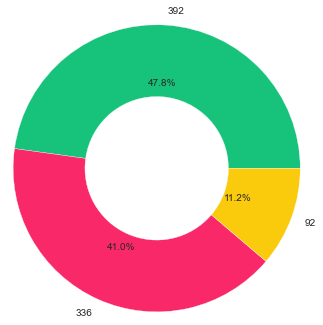

In [33]:
percent_class=df_like.value_counts()
colors = ['#17C37B','#F92969','#FACA0C']

my_pie,_,_= plt.pie(percent_class,radius = 1.2,labels=percent_class,colors=colors,autopct="%.1f%%")

plt.setp(my_pie, width=0.6, edgecolor='white') 

plt.show()

# Regular Expressions

we use Regular Expression by  string-searching algorithms for "find" or "find and replace" operations on strings, or for input validation.

In [34]:
# Convert to list
data = dataframe[dataframe.columns[0]].values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

# Remove Numbers
data = [re.sub("\d", "", sent) for sent in data]

data = [re.sub("pdf", "", sent) for sent in data]
data = [re.sub("!", "", sent) for sent in data]
data = [re.sub("ÿüÿü", "", sent) for sent in data]
data = [re.sub("üëéüëé", "", sent) for sent in data]
data = [re.sub("ŸÖŸÜ", "ÿßŸÜ", sent) for sent in data]
data = [re.sub("ÿπŸÜ", "ÿπŸÑŸâ", sent) for sent in data]
data = [re.sub("ÿßÿ∞ÿß", "ŸÑŸÖÿßÿ∞ÿß", sent) for sent in data]
print(data)

['ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ±ÿßÿ¶ÿπ ŸàÿÆÿØŸÖÿßÿ™ ŸÖŸÖÿ™ÿßÿ≤ÿ©', 'ÿ¨ÿØÿß ÿ¨ŸÖŸäŸÑ ŸàŸÖÿÆÿ™ÿµÿ± ÿπŸÑŸâ ÿßŸÑŸÜÿßÿ≥ ŸÅŸä ÿ™ŸÜÿ®Ÿäÿ© ÿßŸÑŸÖŸàÿßÿπŸäÿØ ', 'ÿ¨ŸäÿØ ÿ¨ÿØÿß..ŸàŸäÿ≠ÿ™ÿßÿ¨ ÿßŸÜ ŸäÿØŸÖÿ¨ ŸÖÿπ ÿ™ŸàŸÉŸÑŸÜÿß ŸÑÿÆÿØŸÖÿ© ÿßŸÑÿ¨ŸàÿßŸÑÿßÿ™ ÿßŸÜ ŸÉÿ´ÿ±ÿ© ÿßŸÑÿ®ÿ±ÿßŸÖÿ¨ ŸàÿßŸÑÿßÿ≥ÿ™ŸÅÿßÿØÿ©..ÿßŸÑÿ¢ŸÜ ÿ£ÿπŸÖŸÑ ÿØÿÆŸàŸÑ ÿßŸÜÿ™ÿ∏ÿ± ŸÅÿ™ÿ±ÿ© ŸÖÿßÿ™ÿ¨Ÿä ÿ•ÿ±ÿ≥ÿßŸÑŸäÿ© ÿ±ŸÇŸÖ ÿßŸÑÿ™ÿ≠ŸÇŸÇ ÿßŸäÿ¥ ÿßŸÑŸÖÿ¥ŸÉŸÑÿ© ŸÑÿß ÿßÿπŸÑŸÖ.', 'ÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸÉŸàŸäÿ≥ ÿ¨ÿØÿßŸã', 'ŸÑŸÑÿ£ÿ≥ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿßÿµÿ®ÿ≠ ÿ≥Ÿäÿ¶ ŸÑŸÖ ÿßÿ¨ÿØ ÿßÿ≥ŸÖ ŸÖÿØŸäŸÜÿ™Ÿä ŸàŸÑÿß ÿ£ÿ≥ÿ™ÿ∑Ÿäÿπ ŸÅÿ™ÿ≠ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ', 'ÿ´ÿ®ÿ™ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ Ÿàÿ®ÿπÿØ ÿßŸÑŸÖŸàŸÇÿπ Ÿàÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸÖÿØŸäŸÜÿ© ÿπŸÑŸâÿØ ÿßÿ≥ŸÖ ÿßŸÑÿ≠Ÿä ŸÑÿßŸäŸÉÿ™ÿ® ÿßÿ≥ŸÖ ÿßŸÑÿ≠Ÿä ÿπŸÑŸä ÿßŸÑÿßÿ∑ŸÑÿßŸÇ ', 'ÿ®ÿπÿØ ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿßŸÑÿ¨ÿØŸäÿØ ÿ™ÿ∑ÿ®ŸäŸÇ ÿµÿ≠ÿ™Ÿä ŸÑÿßŸäŸÅÿ™ÿ≠ Ÿàÿ®ÿπÿØ ÿßÿØÿÆÿßŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑŸÖÿ∑ŸÑŸàÿ®ÿ© ', 'ŸÖŸÖÿ™ÿßÿ≤ ÿ¨ÿØÿß ÿ®ÿßÿ±ŸÉ ÿßŸÑŸÑŸá ŸÅŸäŸáŸÖ ÿ¨ŸÖŸäÿπÿß', 'ŸÖŸÖÿ™ÿßÿ≤ ÿ¨ÿØÿß Ÿà ŸÑŸäÿ≥ ŸÖÿπŸÇÿØ ÿ£Ÿà ÿ¥Ÿä ÿµÿπÿ® ÿ¥ŸÉÿ±ÿß ŸÑŸÉŸÑ ÿßŸÜ ÿ≥ÿßŸáŸÖ Ÿà ŸÇÿßŸÖ Ÿà ÿ∑Ÿà

In [35]:
stopwords_list = stopwords.words('arabic')
stopwords_list

['ÿ•ÿ∞',
 'ÿ•ÿ∞ÿß',
 'ÿ•ÿ∞ŸÖÿß',
 'ÿ•ÿ∞ŸÜ',
 'ÿ£ŸÅ',
 'ÿ£ŸÇŸÑ',
 'ÿ£ŸÉÿ´ÿ±',
 'ÿ£ŸÑÿß',
 'ÿ•ŸÑÿß',
 'ÿßŸÑÿ™Ÿä',
 'ÿßŸÑÿ∞Ÿä',
 'ÿßŸÑÿ∞ŸäŸÜ',
 'ÿßŸÑŸÑÿßÿ™Ÿä',
 'ÿßŸÑŸÑÿßÿ¶Ÿä',
 'ÿßŸÑŸÑÿ™ÿßŸÜ',
 'ÿßŸÑŸÑÿ™Ÿäÿß',
 'ÿßŸÑŸÑÿ™ŸäŸÜ',
 'ÿßŸÑŸÑÿ∞ÿßŸÜ',
 'ÿßŸÑŸÑÿ∞ŸäŸÜ',
 'ÿßŸÑŸÑŸàÿßÿ™Ÿä',
 'ÿ•ŸÑŸâ',
 'ÿ•ŸÑŸäŸÉ',
 'ÿ•ŸÑŸäŸÉŸÖ',
 'ÿ•ŸÑŸäŸÉŸÖÿß',
 'ÿ•ŸÑŸäŸÉŸÜ',
 'ÿ£ŸÖ',
 'ÿ£ŸÖÿß',
 'ÿ£ŸÖÿß',
 'ÿ•ŸÖÿß',
 'ÿ£ŸÜ',
 'ÿ•ŸÜ',
 'ÿ•ŸÜÿß',
 'ÿ£ŸÜÿß',
 'ÿ£ŸÜÿ™',
 'ÿ£ŸÜÿ™ŸÖ',
 'ÿ£ŸÜÿ™ŸÖÿß',
 'ÿ£ŸÜÿ™ŸÜ',
 'ÿ•ŸÜŸÖÿß',
 'ÿ•ŸÜŸá',
 'ÿ£ŸÜŸâ',
 'ÿ£ŸÜŸâ',
 'ÿ¢Ÿá',
 'ÿ¢Ÿáÿß',
 'ÿ£Ÿà',
 'ÿ£ŸàŸÑÿßÿ°',
 'ÿ£ŸàŸÑÿ¶ŸÉ',
 'ÿ£ŸàŸá',
 'ÿ¢Ÿä',
 'ÿ£Ÿä',
 'ÿ£ŸäŸáÿß',
 'ÿ•Ÿä',
 'ÿ£ŸäŸÜ',
 'ÿ£ŸäŸÜ',
 'ÿ£ŸäŸÜŸÖÿß',
 'ÿ•ŸäŸá',
 'ÿ®ÿÆ',
 'ÿ®ÿ≥',
 'ÿ®ÿπÿØ',
 'ÿ®ÿπÿ∂',
 'ÿ®ŸÉ',
 'ÿ®ŸÉŸÖ',
 'ÿ®ŸÉŸÖ',
 'ÿ®ŸÉŸÖÿß',
 'ÿ®ŸÉŸÜ',
 'ÿ®ŸÑ',
 'ÿ®ŸÑŸâ',
 'ÿ®ŸÖÿß',
 'ÿ®ŸÖÿßÿ∞ÿß',
 'ÿ®ŸÖŸÜ',
 'ÿ®ŸÜÿß',
 'ÿ®Ÿá',
 'ÿ®Ÿáÿß',
 'ÿ®ŸáŸÖ',
 'ÿ®ŸáŸÖÿß',
 'ÿ®ŸáŸÜ',
 'ÿ®Ÿä',
 'ÿ®ŸäŸÜ',
 'ÿ®ŸäÿØ',
 'ÿ™ŸÑŸÉ',
 'ÿ™ŸÑŸÉŸÖ',
 'ÿ™ŸÑŸÉŸÖÿß',
 'ÿ™Ÿá',
 'ÿ™Ÿä',
 'ÿ™ŸäŸ

In [36]:
# return an array
stemmer = FarasaStemmer()

def stemm(tweetstr):
    stemstr = []
    for s in tweetstr:
        st = stemmer.stem(s)
        stemstr.append(st)
    return stemstr

In [37]:
data = stemm(data)

In [38]:
data

['ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ±ÿßÿ¶ÿπ ÿÆÿØŸÖÿ© ŸÖŸÖÿ™ÿßÿ≤',
 'ÿ¨ÿØ ÿ¨ŸÖŸäŸÑ ŸÖÿÆÿ™ÿµÿ± ÿπŸÑŸâ ŸÜÿßÿ≥ ŸÅŸä ÿ™ŸÜÿ®Ÿä ŸÖŸàÿπÿØ',
 'ÿ¨ŸäÿØ ÿ¨ÿØ . .ŸàŸäÿ≠ÿ™ÿßÿ¨ ÿßŸÜ ÿ£ÿØŸÖÿ¨ ŸÖÿπ ÿ™ŸàŸÉŸÑ ÿÆÿØŸÖÿ© ÿ¨ŸàÿßŸÑ ÿßŸÜ ŸÉÿ´ÿ±ÿ© ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿßÿ≥ÿ™ŸÅÿßÿØÿ© . .ÿßŸÑÿ¢ŸÜ ÿπŸÖŸÑ ÿØÿÆŸàŸÑ ÿßŸÜÿ™ÿ∏ÿ± ŸÅÿ™ÿ±ÿ© ŸÖÿßÿ™ÿ¨Ÿä ÿ•ÿ±ÿ≥ÿßŸÑŸä ÿ±ŸÇŸÖ ÿ™ÿ≠ŸÇŸÇ ÿßŸäÿ¥ ŸÖÿ¥ŸÉŸÑÿ© ŸÑÿß ÿßÿπŸÑŸÖ .',
 'ÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸÉŸàŸäÿ≥ ÿ¨ÿØ',
 'ÿ£ÿ≥ŸÅ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ£ÿµÿ®ÿ≠ ÿ≥Ÿäÿ¶ ŸÑŸÖ ÿ£ÿ¨ÿØ ÿßÿ≥ŸÖ ŸÖÿØŸäŸÜÿ© ŸÑÿß ÿßÿ≥ÿ™ÿ∑ÿßÿπ ŸÅÿ™ÿ≠ ÿ™ÿ∑ÿ®ŸäŸÇ',
 'ÿ´ÿ®ÿ™ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ®ÿπÿØ ŸÖŸàŸÇÿπ ÿ™ÿ≠ÿØŸäÿØ ŸÖÿØŸäŸÜÿ© ÿπŸÑŸâÿØ ÿßÿ≥ŸÖ ÿ≠Ÿä ŸÑÿßŸäŸÉÿ™ÿ® ÿßÿ≥ŸÖ ÿ≠Ÿä ÿπŸÑŸä ÿ•ÿ∑ŸÑÿßŸÇ',
 'ÿ®ÿπÿØ ÿ™ÿ≠ÿØŸäÿ´ ÿ¨ÿØŸäÿØ ÿ™ÿ∑ÿ®ŸäŸÇ ÿµÿ≠ÿ© ŸÑÿßŸäŸÅÿ™ÿ≠ ÿ®ÿπÿØ ÿ•ÿØÿÆÿßŸÑ ÿ®ŸäÿßŸÜ ŸÖÿ∑ŸÑŸàÿ®',
 'ŸÖŸÖÿ™ÿßÿ≤ ÿ¨ÿØ ÿ®ÿßÿ±ÿßŸÉ ÿßŸÑŸÑŸá ŸÅŸä ÿ¨ŸÖŸäÿπ',
 'ŸÖŸÖÿ™ÿßÿ≤ ÿ¨ÿØ Ÿà ŸÑŸäÿ≥ ŸÖÿπŸÇÿØ ÿ£Ÿà ÿ¥Ÿä ÿµÿπÿ® ÿ¥ŸÉÿ± ŸÉŸÑ ÿßŸÜ ÿ≥ÿßŸáŸÖ Ÿà ŸÇÿßŸÖ Ÿà ÿ∑Ÿàÿ± Ÿáÿ∞ÿß ÿ®ÿ±ŸÜÿßŸÖÿ¨ Ÿà ÿ≠ŸÅÿ∏ ÿßŸÑŸÑŸá ŸÖŸÖŸÑŸÉÿ© Ÿà ŸÖŸÑŸäŸÉ Ÿà ÿßŸÖÿ±ÿßÿ¶ Ÿà ÿ¥ÿπÿ® Ÿáÿ∞ÿß ŸÖŸÖŸÑŸÉÿ© ÿ∑Ÿäÿ®',
 'ŸÖŸÖÿ™ÿßÿ≤ ÿ®ÿßÿ±ÿ

# TF-IDF$CountVectorizer

In [206]:
#Instantiate
vectorizer=CountVectorizer()
# Fit Transform
countvec=vectorizer.fit_transform(data)

In [207]:
countvec.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [208]:

vectorizer.get_feature_names() # feature names are the terms /words

['ÿ¢ÿ¢ÿßŸÜ',
 'ÿ¢ÿÆÿ±',
 'ÿ¢ÿ¥',
 'ÿ¢ŸÖŸäŸÜ',
 'ÿ¢ŸÜ',
 'ÿ£ÿ£ŸÉÿØ',
 'ÿ£ÿ®',
 'ÿ£ÿ®ÿØ',
 'ÿ£ÿ®ÿ±ÿßÿ¨',
 'ÿ£ÿ®ÿπÿØ',
 'ÿ£ÿ®ŸÜÿßÿ°',
 'ÿ£ÿ™ÿßÿ≠',
 'ÿ£ÿ™ÿßŸÜŸâ',
 'ÿ£ÿ™ŸÖŸÉŸÜ',
 'ÿ£ÿ™Ÿâ',
 'ÿ£ÿ´ŸÜÿßÿ°',
 'ÿ£ÿ¨ÿØ',
 'ÿ£ÿ¨ŸÑ',
 'ÿ£ÿ¨ŸÖÿπ',
 'ÿ£ÿ¨ŸÖŸÑ',
 'ÿ£ÿ¨Ÿäÿ±',
 'ÿ£ÿ≠ÿ®',
 'ÿ£ÿ≠ÿ¨ÿ≤',
 'ÿ£ÿ≠ÿØ',
 'ÿ£ÿ≠ÿØÿ´',
 'ÿ£ÿ≠ÿ≥ŸÜ',
 'ÿ£ÿ≠ŸäÿßŸÜ',
 'ÿ£ÿÆ',
 'ÿ£ÿÆÿ®ÿ±',
 'ÿ£ÿÆÿ∞',
 'ÿ£ÿÆÿ±ÿ¨',
 'ÿ£ÿÆÿ±Ÿâ',
 'ÿ£ÿÆŸÅŸâ',
 'ÿ£ÿÆŸäÿ±',
 'ÿ£ÿØÿßÿ°',
 'ÿ£ÿØÿßŸÖ',
 'ÿ£ÿØÿÆŸÑ',
 'ÿ£ÿØŸÖÿ¨',
 'ÿ£ÿØŸÜŸâ',
 'ÿ£ÿØŸâ',
 'ÿ£ÿ∞Ÿáÿ®',
 'ÿ£ÿ±ÿßÿØ',
 'ÿ£ÿ±ÿ®ÿπ',
 'ÿ£ÿ±ÿ¨Ÿà',
 'ÿ£ÿ±ÿ≥ŸÑ',
 'ÿ£ÿ±ŸÅÿπ',
 'ÿ£ÿ±ŸäÿØ',
 'ÿ£ÿ≤ÿßÿØ',
 'ÿ£ÿ≤ÿπÿ¨ÿ™ŸàŸÜÿß',
 'ÿ£ÿ≥ÿ®Ÿàÿπ',
 'ÿ£ÿ≥ÿ™ÿ∑ÿπ',
 'ÿ£ÿ≥ÿ™ÿ∑Ÿäÿπ',
 'ÿ£ÿ≥ÿ™ŸÅÿßÿØ',
 'ÿ£ÿ≥ÿ™ŸÇÿ®ÿßŸÑ',
 'ÿ£ÿ≥ÿ±ÿ©',
 'ÿ£ÿ≥ÿ±ÿπ',
 'ÿ£ÿ≥ŸÅ',
 'ÿ£ÿ≥ŸÑŸàÿ®',
 'ÿ£ÿ≥Ÿàÿ£',
 'ÿ£ÿ¥ÿ±ŸÅ',
 'ÿ£ÿ¥ŸÉÿ±',
 'ÿ£ÿµÿ®ÿ≠',
 'ÿ£ÿµŸÑÿ≠',
 'ÿ£ÿ∂ÿßŸÅ',
 'ÿ£ÿ∂ÿ∫ÿ∑',
 'ÿ£ÿπÿßÿØ',
 'ÿ£ÿπÿØ',
 'ÿ£ÿπÿ±ŸÅ',
 'ÿ£ÿπÿ∑Ÿâ',
 'ÿ£ÿπŸÑŸÖ',
 'ÿ£ÿπŸÑŸâ',
 'ÿ£ÿ∫ŸÑÿ®',
 'ÿ£ÿ∫ŸÑŸÇ',
 'ÿ£ÿ∫ŸÜŸâ',
 'ÿ£ŸÅÿßÿØ',
 'ÿ£ŸÅÿ±ÿßÿØ',
 'ÿ£ŸÅÿ∂

In [209]:
# Instantate with hyperparameter = 20 terms
vectorizer=CountVectorizer(max_features=20)
# Fit Transform
countvec=vectorizer.fit_transform(data)

In [210]:
print(countvec.A)
print(vectorizer.get_feature_names())

[[0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 2 1 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['ÿßŸÑŸÑŸá', 'ÿßŸÜ', 'ÿ®ÿ±ŸÜÿßŸÖÿ¨', 'ÿ®ÿπÿØ', 'ÿ™ÿ≠ÿØŸäÿ´', 'ÿ™ÿ∑ÿ®ŸäŸÇ', 'ÿ¨ÿØ', 'ÿ¨ŸäÿØ', 'ÿ±ÿßÿ¶ÿπ', 'ÿ¥ŸÉÿ±', 'ÿ∑ŸÑÿ®', 'ÿπŸÑŸâ', 'ÿπŸÖŸÑ', 'ŸÅÿ™ÿ≠', 'ŸÅŸä', 'ŸÉŸÑ', 'ŸÑÿß', 'ŸÖÿß', 'ŸÖŸÖÿ™ÿßÿ≤', 'ŸÖŸàÿπÿØ']


In [211]:

# Instantiate with hyperparameter = 6 terms 
vectorizer=CountVectorizer(max_features=6, ngram_range=(1,2))
# Fit Transform
countvec=vectorizer.fit_transform(data)

In [212]:
print(countvec.A)
print(vectorizer.get_feature_names())

[[0 0 0 0 0 0]
 [0 0 0 1 1 0]
 [2 0 0 1 0 1]
 ...
 [1 0 1 1 3 1]
 [0 1 1 0 0 0]
 [0 0 1 0 0 0]]
['ÿßŸÜ', 'ÿ™ÿ≠ÿØŸäÿ´', 'ÿ™ÿ∑ÿ®ŸäŸÇ', 'ÿ¨ÿØ', 'ŸÅŸä', 'ŸÑÿß']


###### TF = (# occurrences of term t in document) / (# of words in document)

In [213]:
# No hyperparameter set for number of words
vectorizer=TfidfVectorizer(use_idf=False, norm='l1')
tfvec=vectorizer.fit_transform(data)

In [214]:
print(tfvec.A)
print(vectorizer.get_feature_names()) # gives all feature names

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['ÿ¢ÿ¢ÿßŸÜ', 'ÿ¢ÿÆÿ±', 'ÿ¢ÿ¥', 'ÿ¢ŸÖŸäŸÜ', 'ÿ¢ŸÜ', 'ÿ£ÿ£ŸÉÿØ', 'ÿ£ÿ®', 'ÿ£ÿ®ÿØ', 'ÿ£ÿ®ÿ±ÿßÿ¨', 'ÿ£ÿ®ÿπÿØ', 'ÿ£ÿ®ŸÜÿßÿ°', 'ÿ£ÿ™ÿßÿ≠', 'ÿ£ÿ™ÿßŸÜŸâ', 'ÿ£ÿ™ŸÖŸÉŸÜ', 'ÿ£ÿ™Ÿâ', 'ÿ£ÿ´ŸÜÿßÿ°', 'ÿ£ÿ¨ÿØ', 'ÿ£ÿ¨ŸÑ', 'ÿ£ÿ¨ŸÖÿπ', 'ÿ£ÿ¨ŸÖŸÑ', 'ÿ£ÿ¨Ÿäÿ±', 'ÿ£ÿ≠ÿ®', 'ÿ£ÿ≠ÿ¨ÿ≤', 'ÿ£ÿ≠ÿØ', 'ÿ£ÿ≠ÿØÿ´', 'ÿ£ÿ≠ÿ≥ŸÜ', 'ÿ£ÿ≠ŸäÿßŸÜ', 'ÿ£ÿÆ', 'ÿ£ÿÆÿ®ÿ±', 'ÿ£ÿÆÿ∞', 'ÿ£ÿÆÿ±ÿ¨', 'ÿ£ÿÆÿ±Ÿâ', 'ÿ£ÿÆŸÅŸâ', 'ÿ£ÿÆŸäÿ±', 'ÿ£ÿØÿßÿ°', 'ÿ£ÿØÿßŸÖ', 'ÿ£ÿØÿÆŸÑ', 'ÿ£ÿØŸÖÿ¨', 'ÿ£ÿØŸÜŸâ', 'ÿ£ÿØŸâ', 'ÿ£ÿ∞Ÿáÿ®', 'ÿ£ÿ±ÿßÿØ', 'ÿ£ÿ±ÿ®ÿπ', 'ÿ£ÿ±ÿ¨Ÿà', 'ÿ£ÿ±ÿ≥ŸÑ', 'ÿ£ÿ±ŸÅÿπ', 'ÿ£ÿ±ŸäÿØ', 'ÿ£ÿ≤ÿßÿØ', 'ÿ£ÿ≤ÿπÿ¨ÿ™ŸàŸÜÿß', 'ÿ£ÿ≥ÿ®Ÿàÿπ', 'ÿ£ÿ≥ÿ™ÿ∑ÿπ', 'ÿ£ÿ≥ÿ™ÿ∑Ÿäÿπ', 'ÿ£ÿ≥ÿ™ŸÅÿßÿØ', 'ÿ£ÿ≥ÿ™ŸÇÿ®ÿßŸÑ', 'ÿ£ÿ≥ÿ±ÿ©', 'ÿ£ÿ≥ÿ±ÿπ', 'ÿ£ÿ≥ŸÅ', 'ÿ£ÿ≥ŸÑŸàÿ®', 'ÿ£ÿ≥Ÿàÿ£', 'ÿ£ÿ¥ÿ±ŸÅ', 'ÿ£ÿ¥ŸÉÿ±', 'ÿ£ÿµÿ®ÿ≠', 'ÿ£ÿµŸÑÿ≠', 'ÿ£ÿ∂ÿßŸÅ', 'ÿ£ÿ∂ÿ∫ÿ∑', 'ÿ£ÿπÿßÿØ', 'ÿ£ÿπÿØ', 'ÿ£ÿπÿ±ŸÅ', 'ÿ£ÿπÿ∑Ÿâ', 'ÿ£ÿπŸÑŸÖ', '

###### IDF = log(# of documents / # documents with term t in them)


In [215]:
# Instantiate
vectorizer_idf=TfidfVectorizer(smooth_idf=False) # eliminates log(0)
# Fit Transform
tfidfvec=vectorizer_idf.fit_transform(data)

In [216]:
print(vectorizer_idf.idf_)
print(vectorizer_idf.get_feature_names())

[7.70930434 4.6647819  7.70930434 ... 7.70930434 5.31140907 7.01615716]
['ÿ¢ÿ¢ÿßŸÜ', 'ÿ¢ÿÆÿ±', 'ÿ¢ÿ¥', 'ÿ¢ŸÖŸäŸÜ', 'ÿ¢ŸÜ', 'ÿ£ÿ£ŸÉÿØ', 'ÿ£ÿ®', 'ÿ£ÿ®ÿØ', 'ÿ£ÿ®ÿ±ÿßÿ¨', 'ÿ£ÿ®ÿπÿØ', 'ÿ£ÿ®ŸÜÿßÿ°', 'ÿ£ÿ™ÿßÿ≠', 'ÿ£ÿ™ÿßŸÜŸâ', 'ÿ£ÿ™ŸÖŸÉŸÜ', 'ÿ£ÿ™Ÿâ', 'ÿ£ÿ´ŸÜÿßÿ°', 'ÿ£ÿ¨ÿØ', 'ÿ£ÿ¨ŸÑ', 'ÿ£ÿ¨ŸÖÿπ', 'ÿ£ÿ¨ŸÖŸÑ', 'ÿ£ÿ¨Ÿäÿ±', 'ÿ£ÿ≠ÿ®', 'ÿ£ÿ≠ÿ¨ÿ≤', 'ÿ£ÿ≠ÿØ', 'ÿ£ÿ≠ÿØÿ´', 'ÿ£ÿ≠ÿ≥ŸÜ', 'ÿ£ÿ≠ŸäÿßŸÜ', 'ÿ£ÿÆ', 'ÿ£ÿÆÿ®ÿ±', 'ÿ£ÿÆÿ∞', 'ÿ£ÿÆÿ±ÿ¨', 'ÿ£ÿÆÿ±Ÿâ', 'ÿ£ÿÆŸÅŸâ', 'ÿ£ÿÆŸäÿ±', 'ÿ£ÿØÿßÿ°', 'ÿ£ÿØÿßŸÖ', 'ÿ£ÿØÿÆŸÑ', 'ÿ£ÿØŸÖÿ¨', 'ÿ£ÿØŸÜŸâ', 'ÿ£ÿØŸâ', 'ÿ£ÿ∞Ÿáÿ®', 'ÿ£ÿ±ÿßÿØ', 'ÿ£ÿ±ÿ®ÿπ', 'ÿ£ÿ±ÿ¨Ÿà', 'ÿ£ÿ±ÿ≥ŸÑ', 'ÿ£ÿ±ŸÅÿπ', 'ÿ£ÿ±ŸäÿØ', 'ÿ£ÿ≤ÿßÿØ', 'ÿ£ÿ≤ÿπÿ¨ÿ™ŸàŸÜÿß', 'ÿ£ÿ≥ÿ®Ÿàÿπ', 'ÿ£ÿ≥ÿ™ÿ∑ÿπ', 'ÿ£ÿ≥ÿ™ÿ∑Ÿäÿπ', 'ÿ£ÿ≥ÿ™ŸÅÿßÿØ', 'ÿ£ÿ≥ÿ™ŸÇÿ®ÿßŸÑ', 'ÿ£ÿ≥ÿ±ÿ©', 'ÿ£ÿ≥ÿ±ÿπ', 'ÿ£ÿ≥ŸÅ', 'ÿ£ÿ≥ŸÑŸàÿ®', 'ÿ£ÿ≥Ÿàÿ£', 'ÿ£ÿ¥ÿ±ŸÅ', 'ÿ£ÿ¥ŸÉÿ±', 'ÿ£ÿµÿ®ÿ≠', 'ÿ£ÿµŸÑÿ≠', 'ÿ£ÿ∂ÿßŸÅ', 'ÿ£ÿ∂ÿ∫ÿ∑', 'ÿ£ÿπÿßÿØ', 'ÿ£ÿπÿØ', 'ÿ£ÿπÿ±ŸÅ', 'ÿ£ÿπÿ∑Ÿâ', 'ÿ£ÿπŸÑŸÖ', 'ÿ£ÿπŸÑŸâ', 'ÿ£ÿ∫ŸÑÿ®', 'ÿ£ÿ∫ŸÑŸÇ', 'ÿ£ÿ∫ŸÜŸâ', 'ÿ£ŸÅÿßÿØ', 'ÿ£ŸÅÿ±ÿßÿØ', 'ÿ£ŸÅÿ∂ŸÑ',

In [217]:
# This is the final TF-IDF matrix
tfidfvec.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Topic Modeling -LDA

In [218]:
def tokenize(text):
    tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 3 and len(word.strip('Xx/')) > 2) ] 
    stems = [stemmer.stem(item) for item in tokens]
    return tokens

In [219]:
vectorizer_tf = TfidfVectorizer(max_df=0.75, min_df=50, max_features=10000, use_idf=False, norm=None)
tf_vectors = vectorizer_tf.fit_transform(X_train.complaints)

In [220]:
tf_vectors.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 1., 0., ..., 2., 0., 0.]])

In [221]:
vectorizer_idf.get_feature_names()

['ÿ¢ÿ¢ÿßŸÜ',
 'ÿ¢ÿÆÿ±',
 'ÿ¢ÿ¥',
 'ÿ¢ŸÖŸäŸÜ',
 'ÿ¢ŸÜ',
 'ÿ£ÿ£ŸÉÿØ',
 'ÿ£ÿ®',
 'ÿ£ÿ®ÿØ',
 'ÿ£ÿ®ÿ±ÿßÿ¨',
 'ÿ£ÿ®ÿπÿØ',
 'ÿ£ÿ®ŸÜÿßÿ°',
 'ÿ£ÿ™ÿßÿ≠',
 'ÿ£ÿ™ÿßŸÜŸâ',
 'ÿ£ÿ™ŸÖŸÉŸÜ',
 'ÿ£ÿ™Ÿâ',
 'ÿ£ÿ´ŸÜÿßÿ°',
 'ÿ£ÿ¨ÿØ',
 'ÿ£ÿ¨ŸÑ',
 'ÿ£ÿ¨ŸÖÿπ',
 'ÿ£ÿ¨ŸÖŸÑ',
 'ÿ£ÿ¨Ÿäÿ±',
 'ÿ£ÿ≠ÿ®',
 'ÿ£ÿ≠ÿ¨ÿ≤',
 'ÿ£ÿ≠ÿØ',
 'ÿ£ÿ≠ÿØÿ´',
 'ÿ£ÿ≠ÿ≥ŸÜ',
 'ÿ£ÿ≠ŸäÿßŸÜ',
 'ÿ£ÿÆ',
 'ÿ£ÿÆÿ®ÿ±',
 'ÿ£ÿÆÿ∞',
 'ÿ£ÿÆÿ±ÿ¨',
 'ÿ£ÿÆÿ±Ÿâ',
 'ÿ£ÿÆŸÅŸâ',
 'ÿ£ÿÆŸäÿ±',
 'ÿ£ÿØÿßÿ°',
 'ÿ£ÿØÿßŸÖ',
 'ÿ£ÿØÿÆŸÑ',
 'ÿ£ÿØŸÖÿ¨',
 'ÿ£ÿØŸÜŸâ',
 'ÿ£ÿØŸâ',
 'ÿ£ÿ∞Ÿáÿ®',
 'ÿ£ÿ±ÿßÿØ',
 'ÿ£ÿ±ÿ®ÿπ',
 'ÿ£ÿ±ÿ¨Ÿà',
 'ÿ£ÿ±ÿ≥ŸÑ',
 'ÿ£ÿ±ŸÅÿπ',
 'ÿ£ÿ±ŸäÿØ',
 'ÿ£ÿ≤ÿßÿØ',
 'ÿ£ÿ≤ÿπÿ¨ÿ™ŸàŸÜÿß',
 'ÿ£ÿ≥ÿ®Ÿàÿπ',
 'ÿ£ÿ≥ÿ™ÿ∑ÿπ',
 'ÿ£ÿ≥ÿ™ÿ∑Ÿäÿπ',
 'ÿ£ÿ≥ÿ™ŸÅÿßÿØ',
 'ÿ£ÿ≥ÿ™ŸÇÿ®ÿßŸÑ',
 'ÿ£ÿ≥ÿ±ÿ©',
 'ÿ£ÿ≥ÿ±ÿπ',
 'ÿ£ÿ≥ŸÅ',
 'ÿ£ÿ≥ŸÑŸàÿ®',
 'ÿ£ÿ≥Ÿàÿ£',
 'ÿ£ÿ¥ÿ±ŸÅ',
 'ÿ£ÿ¥ŸÉÿ±',
 'ÿ£ÿµÿ®ÿ≠',
 'ÿ£ÿµŸÑÿ≠',
 'ÿ£ÿ∂ÿßŸÅ',
 'ÿ£ÿ∂ÿ∫ÿ∑',
 'ÿ£ÿπÿßÿØ',
 'ÿ£ÿπÿØ',
 'ÿ£ÿπÿ±ŸÅ',
 'ÿ£ÿπÿ∑Ÿâ',
 'ÿ£ÿπŸÑŸÖ',
 'ÿ£ÿπŸÑŸâ',
 'ÿ£ÿ∫ŸÑÿ®',
 'ÿ£ÿ∫ŸÑŸÇ',
 'ÿ£ÿ∫ŸÜŸâ',
 'ÿ£ŸÅÿßÿØ',
 'ÿ£ŸÅÿ±ÿßÿØ',
 'ÿ£ŸÅÿ∂

In [222]:
X_train.complaints

581    ÿØÿßŸäŸÖ Ÿäÿ™ÿπÿ∑ŸÑ Ÿàÿ£ÿ¨ÿØ ÿµÿπŸàÿ®ÿ© ŸÅŸä ÿ™ÿ≥ÿ¨ŸäŸÑ ÿßŸÑŸÖÿ±ÿßŸÅŸÇŸäŸÜ ŸàŸÑÿßŸäÿ≠ÿ≥ÿ® ÿÆÿ∑Ÿàÿßÿ™ŸÉ ÿßŸÑŸäŸàŸÖŸäÿ© ÿ®ÿßŸÜÿ™ÿ∏ÿßŸÖ                                                                 
89     ÿ™ÿ∑ÿ®ŸäŸÇ ŸÖŸÖÿ™ÿßÿ≤. ÿ£ÿ≥ÿ£ŸÑ ÿßŸÑŸÑŸá ÿ£ŸÜ Ÿäÿ®ÿßÿ±ŸÉ ŸÑŸÉŸÑ ÿßŸÑŸÇÿßÿ¶ŸÖŸäŸÜ ÿπŸÑŸâ Ÿáÿ∞ÿß ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸàÿßŸÑŸÑŸá Ÿäÿ≠ŸÖŸäŸÜÿß ÿ¨ŸÖŸäÿπÿß                                                         
451    ŸÖŸÖÿ™ÿßÿ≤ ÿ¨ÿØÿß Ÿà ŸÑŸäÿ≥ ŸÖÿπŸÇÿØ ÿ£Ÿà ÿ¥Ÿä ÿµÿπÿ® ÿ¥ŸÉÿ±ÿß ŸÑŸÉŸÑ ŸÖŸÜ ÿ≥ÿßŸáŸÖ Ÿà ŸÇÿßŸÖ Ÿà ÿ∑Ÿàÿ± Ÿáÿ∞ÿß ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ Ÿà ÿ≠ŸÅÿ∏ ÿßŸÑŸÑŸá ŸÖŸÖŸÑŸÉÿ™ŸÜÿß Ÿà ŸÖŸÑŸäŸÉŸÜÿß Ÿà ÿßŸÖÿ±ÿßÿ¶ŸÜÿß Ÿà ÿ¥ÿπÿ® Ÿáÿ∞Ÿä ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿ∑Ÿäÿ®ÿ©¬†
121    ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿßŸÑÿ¨ÿØŸäÿØ ÿ≥Ÿäÿ¶ ÿ¨ÿØÿßŸã ŸàŸÑÿß ŸÜÿ≥ÿ™ÿ∑Ÿäÿπ ÿßŸÑÿØÿÆŸàŸÑ ÿßŸÑŸâ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿå ÿ£ÿ±ÿ¨Ÿà ŸÖÿ≥ÿßÿπÿØÿ™ŸÜÿß ŸÅŸä ÿ∞ŸÑŸÉ                                                             
572    ŸÅŸä ŸÖÿ¥ŸÉŸÑÿ© ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿßÿ´ŸÜÿßÿ° ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸÖŸàŸÇÿπ                                                      

In [223]:
vectorizer_tf.get_feature_names()

['ÿßŸÑÿ™ÿ≠ÿØŸäÿ´',
 'ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ',
 'ÿßŸÑŸÑŸá',
 'ÿ™ÿ≠ÿØŸäÿ´',
 'ÿ™ÿ∑ÿ®ŸäŸÇ',
 'ÿ¨ÿØÿß',
 'ÿπŸÑŸâ',
 'ŸÅŸä',
 'ŸÑÿß',
 'ŸÖŸÖÿ™ÿßÿ≤',
 'ŸÖŸÜ']

### Decomposition method

In [224]:
# Instantiate LDA
lda = decomposition.LatentDirichletAllocation(n_components=6, max_iter=3, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

In [225]:
W1

array([[0.08391219, 0.08346359, 0.08333927, 0.58241306, 0.0835062 ,
        0.08336569],
       [0.02834504, 0.22614567, 0.02863836, 0.02835667, 0.66069902,
        0.02781525],
       [0.21542277, 0.03334983, 0.03383585, 0.0334858 , 0.65027835,
        0.0336274 ],
       ...,
       [0.08334304, 0.08333795, 0.58254324, 0.08369198, 0.08373197,
        0.08335181],
       [0.72160241, 0.05557489, 0.0556119 , 0.05560405, 0.05558896,
        0.0560178 ],
       [0.02411066, 0.66745287, 0.02384645, 0.02445949, 0.02388845,
        0.23624208]])

In [226]:
W1.shape

(574, 6)

In [227]:
num_words=15

vocab = np.array(vectorizer_tf.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [228]:
len(topics)

6

In [229]:
topics

['ŸÖŸÜ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÅŸä ÿπŸÑŸâ ÿßŸÑŸÑŸá ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ÿ≠ÿØŸäÿ´ ŸÖŸÖÿ™ÿßÿ≤ ÿ¨ÿØÿß ŸÑÿß ÿßŸÑÿ™ÿ≠ÿØŸäÿ´',
 'ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿß ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿ™ÿ≠ÿØŸäÿ´ ŸÅŸä ÿπŸÑŸâ ŸÖŸÜ ÿßŸÑŸÑŸá ÿ™ÿ∑ÿ®ŸäŸÇ ÿ¨ÿØÿß ŸÖŸÖÿ™ÿßÿ≤',
 'ÿ¨ÿØÿß ÿπŸÑŸâ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ŸÖŸÜ ŸÑÿß ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ÿ≠ÿØŸäÿ´ ŸÖŸÖÿ™ÿßÿ≤ ÿßŸÑŸÑŸá ŸÅŸä',
 'ÿ™ÿ∑ÿ®ŸäŸÇ ŸÅŸä ÿ¨ÿØÿß ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ŸÖŸÜ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿß ÿ™ÿ≠ÿØŸäÿ´ ÿπŸÑŸâ ŸÖŸÖÿ™ÿßÿ≤ ÿßŸÑŸÑŸá',
 'ŸÖŸÖÿ™ÿßÿ≤ ÿßŸÑŸÑŸá ÿ¨ÿØÿß ÿ™ÿ∑ÿ®ŸäŸÇ ŸÅŸä ÿπŸÑŸâ ŸÖŸÜ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ŸÑÿß ÿ™ÿ≠ÿØŸäÿ´',
 'ÿ™ÿ≠ÿØŸäÿ´ ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ŸÖŸÜ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÖŸÖÿ™ÿßÿ≤ ŸÅŸä ÿ¨ÿØÿß ÿ™ÿ∑ÿ®ŸäŸÇ ÿπŸÑŸâ ŸÑÿß ÿßŸÑŸÑŸá']

In [231]:

colnames = ["ÿ•ÿ≤ÿπÿßÿ¨","ŸÖŸÖÿ™ÿßÿ≤","ÿµŸàÿ±ÿ©","ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸÖŸàŸÇÿπ","ŸÖÿ≥ÿßÿπÿØÿ©","ÿßŸÜÿ™ÿ±ŸÜÿ™"]
docnames = ["Doc" + str(i) for i in range(len(X_train.complaints))]
df_doc_topic = pd.DataFrame(np.round(W1, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

In [232]:
df_doc_topic

ÿ•ÿ≤ÿπÿßÿ¨  ŸÖŸÖÿ™ÿßÿ≤  ÿµŸàÿ±ÿ©  ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸÖŸàŸÇÿπ  ŸÖÿ≥ÿßÿπÿØÿ©  ÿßŸÜÿ™ÿ±ŸÜÿ™  dominant_topic
Doc0    0.08   0.08   0.08  0.58          0.08    0.08    3             
Doc1    0.03   0.23   0.03  0.03          0.66    0.03    4             
Doc2    0.22   0.03   0.03  0.03          0.65    0.03    4             
Doc3    0.03   0.40   0.19  0.31          0.03    0.03    1             
Doc4    0.06   0.42   0.06  0.35          0.06    0.06    1             
...      ...    ...    ...   ...           ...     ...   ..             
Doc569  0.17   0.17   0.17  0.17          0.17    0.17    0             
Doc570  0.08   0.08   0.08  0.58          0.08    0.08    3             
Doc571  0.08   0.08   0.58  0.08          0.08    0.08    2             
Doc572  0.72   0.06   0.06  0.06          0.06    0.06    0             
Doc573  0.02   0.67   0.02  0.02          0.02    0.24    1             

[574 rows x 7 columns]

In [233]:
X_train.head()

complaints
581  ÿØÿßŸäŸÖ Ÿäÿ™ÿπÿ∑ŸÑ Ÿàÿ£ÿ¨ÿØ ÿµÿπŸàÿ®ÿ© ŸÅŸä ÿ™ÿ≥ÿ¨ŸäŸÑ ÿßŸÑŸÖÿ±ÿßŸÅŸÇŸäŸÜ ŸàŸÑÿßŸäÿ≠ÿ≥ÿ® ÿÆÿ∑Ÿàÿßÿ™ŸÉ ÿßŸÑŸäŸàŸÖŸäÿ© ÿ®ÿßŸÜÿ™ÿ∏ÿßŸÖ                                                                 
89   ÿ™ÿ∑ÿ®ŸäŸÇ ŸÖŸÖÿ™ÿßÿ≤. ÿ£ÿ≥ÿ£ŸÑ ÿßŸÑŸÑŸá ÿ£ŸÜ Ÿäÿ®ÿßÿ±ŸÉ ŸÑŸÉŸÑ ÿßŸÑŸÇÿßÿ¶ŸÖŸäŸÜ ÿπŸÑŸâ Ÿáÿ∞ÿß ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸàÿßŸÑŸÑŸá Ÿäÿ≠ŸÖŸäŸÜÿß ÿ¨ŸÖŸäÿπÿß                                                         
451  ŸÖŸÖÿ™ÿßÿ≤ ÿ¨ÿØÿß Ÿà ŸÑŸäÿ≥ ŸÖÿπŸÇÿØ ÿ£Ÿà ÿ¥Ÿä ÿµÿπÿ® ÿ¥ŸÉÿ±ÿß ŸÑŸÉŸÑ ŸÖŸÜ ÿ≥ÿßŸáŸÖ Ÿà ŸÇÿßŸÖ Ÿà ÿ∑Ÿàÿ± Ÿáÿ∞ÿß ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ Ÿà ÿ≠ŸÅÿ∏ ÿßŸÑŸÑŸá ŸÖŸÖŸÑŸÉÿ™ŸÜÿß Ÿà ŸÖŸÑŸäŸÉŸÜÿß Ÿà ÿßŸÖÿ±ÿßÿ¶ŸÜÿß Ÿà ÿ¥ÿπÿ® Ÿáÿ∞Ÿä ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿ∑Ÿäÿ®ÿ©¬†
121  ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿßŸÑÿ¨ÿØŸäÿØ ÿ≥Ÿäÿ¶ ÿ¨ÿØÿßŸã ŸàŸÑÿß ŸÜÿ≥ÿ™ÿ∑Ÿäÿπ ÿßŸÑÿØÿÆŸàŸÑ ÿßŸÑŸâ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿå ÿ£ÿ±ÿ¨Ÿà ŸÖÿ≥ÿßÿπÿØÿ™ŸÜÿß ŸÅŸä ÿ∞ŸÑŸÉ                                                             
572  ŸÅŸä ŸÖÿ¥ŸÉŸÑÿ© ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿßÿ´ŸÜÿßÿ° ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸÖŸàŸÇÿπ

In [234]:
# Test on the first 5 documents in X_test
Wtest = lda.transform(vectorizer_tf.transform(X_test.complaints[:5]))

In [235]:
# doccument - topic matris for the first 5 documents in the X_test data
Wtest.shape

(5, 6)

In [237]:
colnames = ["ÿ•ÿ≤ÿπÿßÿ¨","ŸÖŸÖÿ™ÿßÿ≤","ÿµŸàÿ±ÿ©","ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸÖŸàŸÇÿπ","ŸÖÿ≥ÿßÿπÿØÿ©","ÿßŸÜÿ™ÿ±ŸÜÿ™"]
docnames = ["Doc" + str(i) for i in range(len(X_test.complaints[:5]))]
df_doc_topic = pd.DataFrame(np.round(Wtest, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

In [238]:
df_doc_topic.shape

(5, 7)

In [239]:
df_doc_topic

ÿ•ÿ≤ÿπÿßÿ¨  ŸÖŸÖÿ™ÿßÿ≤  ÿµŸàÿ±ÿ©  ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸÖŸàŸÇÿπ  ŸÖÿ≥ÿßÿπÿØÿ©  ÿßŸÜÿ™ÿ±ŸÜÿ™  dominant_topic
Doc0  0.62   0.03   0.03  0.03          0.27    0.03    0             
Doc1  0.17   0.17   0.17  0.17          0.17    0.17    0             
Doc2  0.08   0.58   0.08  0.08          0.08    0.08    1             
Doc3  0.06   0.72   0.06  0.06          0.06    0.06    1             
Doc4  0.06   0.06   0.06  0.39          0.06    0.39    3

In [240]:
X_test.shape

(246, 1)

In [241]:
X_test.head()

complaints
328  ŸÖŸÖÿ™ÿßÿ≤ - ÿ™ŸÖ ÿßŸÑÿ™ŸÖŸÉŸÜ ŸÖŸÜ ÿßŸÑÿ•ÿ∑ŸÑÿßÿπ ÿπŸÑŸâ ÿßŸÑÿ¨ÿ±ÿπÿ™ŸäŸÜ ŸÖŸÜ ÿÆŸÑÿßŸÑ ÿ™ÿ∑ÿ®ŸäŸÇ ÿµÿ≠ÿ™Ÿä
456  ŸäŸÅŸäÿØ ÿßŸÑŸÖÿ¨ÿ™ŸÖÿπ                                                
803  ÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸÑÿß ŸäÿÆÿØŸÖ ŸáÿØŸÅŸá ÿßŸÑÿµÿ≠Ÿäÿ≠                                  
695  ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑŸÑÿ£ÿ≥ŸÅ ŸÑÿß ŸäÿπŸÖŸÑ¬†                                      
739  ÿ™ÿ∑ÿ®ŸäŸÇ ŸÅÿßÿ¥ŸÑ ŸäÿπŸÑŸÇ ŸàŸÉŸÑ ŸÖÿßŸÅÿ™ÿ≠ÿ™Ÿá ÿ∑ŸÑÿ® ÿ™ÿ≠ÿØŸäÿ´

# Topic Modling -NMF

# Stemming words with NLTK

In [242]:
#stemmer = PorterStemmer()
stemmer = nltk.stem.SnowballStemmer('arabic')
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('arabic'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [243]:
# This function will tokenize the words, convert to lower case and do the stemming
def tokenize(text):
    tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 3 and len(word.strip('Xx/')) > 2 and len(re.sub('\d+', '', word.strip('Xx/'))) > 3) ] 
    tokens = map(str.lower, tokens)
    stems = [stemmer.stem(item) for item in tokens if (item not in stop_words)]
    return stems

In [244]:
# Instatiate
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words=None, max_df=0.75, max_features=1000, lowercase=False, ngram_range=(1,2))
# Fit & Transform
tfidf_vectors=vectorizer.fit_transform(X_train["complaints"].values.astype("U"))

In [245]:
tfidf_vectors.shape # THE TERM DOCUMENT MATRIX (MATRIX ON THE LEFT HAND SIDE)

(574, 1000)

In [246]:
tfidf_vectors.A

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.43979725],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [247]:
vectorizer.get_feature_names()

['....',
 'ÿßÿ®ÿßÿ≥',
 'ÿßÿ®ÿØ',
 'ÿßÿ®ÿØ ÿ≠ÿ¨ÿ≤',
 'ÿßÿ®ÿØÿßÿπ',
 'ÿßÿ®ÿØÿßÿπ ÿ±ÿßŸäÿπ',
 'ÿßÿ®ÿ¥ÿ±',
 'ÿßÿ®Ÿà',
 'ÿßÿ™ÿ™ÿπÿßŸÖŸÑ',
 'ÿßÿ™ÿ™ÿπÿßŸÖŸÑ ÿßÿ®ÿØ',
 'ÿßÿ™ÿµÿßŸÑ',
 'ÿßÿ™ÿµÿßŸÑ ÿßŸÜÿ™ÿ±',
 'ÿßÿ™ŸÖ',
 'ÿßÿ™ŸÖŸÜŸâ',
 'ÿßÿ™ŸÖŸÜŸâ ÿßÿµŸÑÿßÿ≠',
 'ÿßÿ¨ÿßÿ®',
 'ÿßÿ¨ÿßÿ≤',
 'ÿßÿ¨ÿßÿ≤ ŸÖÿ±ÿ∂',
 'ÿßÿ¨ÿ±',
 'ÿßÿ≠ÿßŸàŸÑ',
 'ÿßÿ≠ÿßŸàŸÑ ÿßÿ≠ÿØÿ´',
 'ÿßÿ≠ÿ™Ÿäÿßÿ¨',
 'ÿßÿ≠ÿ™Ÿäÿßÿ¨ ÿßŸÑÿ∑ÿ®',
 'ÿßÿ≠ÿ¨ÿ≤',
 'ÿßÿ≠ÿ¨ÿ≤ ŸÖŸàÿπÿØ',
 'ÿßÿ≠ÿØÿ´',
 'ÿßÿ≠ÿØÿ´ ŸàÿßÿØÿÆŸÑ',
 'ÿßÿ≠ÿ∞ŸÅ',
 'ÿßÿ≠ÿ∞ŸÅ Ÿàÿßÿ≠ŸÖŸÑ',
 'ÿßÿ≠ÿ≥',
 'ÿßÿ≠ÿ≥ ÿ±ŸÜÿßŸÖÿ¨',
 'ÿßÿ≠ÿ≥ŸÜÿ™ŸÖ',
 'ÿßÿ≠ÿµŸÑ',
 'ÿßÿ≠ŸÖŸÑ',
 'ÿßÿ≠Ÿäÿß',
 'ÿßÿÆÿ™ÿ±',
 'ÿßÿÆÿ™ŸÅ',
 'ÿßÿÆÿ™ŸÅ ÿ¨ÿ±ÿπ',
 'ÿßÿÆÿ™Ÿäÿßÿ±',
 'ÿßÿÆÿ∞',
 'ÿßÿÆÿ±',
 'ÿßÿÆÿ±Ÿâ',
 'ÿßÿÆÿ∑ÿßÿ°',
 'ÿßÿÆŸäÿ±',
 'ÿßÿÆŸäÿ± ÿ™ÿÆÿ±ÿ¨',
 'ÿßÿÆŸäÿ± ÿ™ÿ∑ÿ®ŸäŸÇ',
 'ÿßÿÆŸäÿ± ŸÖŸàÿπÿØ',
 'ÿßÿÆŸäÿ± Ÿäÿ∑ŸÑÿ®',
 'ÿßÿÆŸäÿ± ŸäÿπŸÖŸÑ',
 'ÿßÿØÿÆÿßŸÑ',
 'ÿßÿØÿÆŸÑ',
 'ÿßÿØÿÆŸÑ ÿ®ŸäÿßŸÜ',
 'ÿßÿØÿÆŸÑ ÿ™ÿ∑ÿ®ŸäŸÇ',
 'ÿßÿØÿÆŸÑ ŸÖÿØŸäŸÜ',
 'ÿßÿØÿÆŸÑ Ÿäÿ∑ŸÑÿπ',
 'ÿßÿ±ÿ¨',
 'ÿßÿ±ÿ¨ ŸÖÿ¥ŸÉŸÑ',
 'ÿßÿ±ÿ¨Ÿà',
 'ÿßÿ±ÿ¨Ÿà ÿ™

In [248]:
len(vectorizer.get_feature_names())

1000

# DECOMPOSITION USING NMF

In [249]:
# INSTANTIATE. n_components is the number of TOPICS
clf = decomposition.NMF(n_components=6, random_state=111) # components is the number of topics

W1 = clf.fit_transform(tfidf_vectors)
H1 = clf.components_

#### NMF Decomposition
### tfidf_vectors =  W1 x H1

In [250]:
tfidf_vectors.shape

(574, 1000)

In [251]:
W1.shape

(574, 6)

In [252]:
W1

array([[7.70347624e-03, 5.92319167e-04, 2.91455241e-04, 8.27370513e-04,
        3.75176879e-05, 4.77955073e-03],
       [0.00000000e+00, 1.59272218e-01, 1.85994009e-01, 9.87539138e-02,
        0.00000000e+00, 0.00000000e+00],
       [4.85528877e-03, 5.94137932e-02, 0.00000000e+00, 4.57203127e-02,
        3.15039828e-03, 4.51003507e-02],
       ...,
       [0.00000000e+00, 1.48980327e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.93395606e-01],
       [0.00000000e+00, 1.36249243e-02, 2.34002866e-02, 1.91720709e-02,
        2.15615883e-02, 0.00000000e+00],
       [2.18175999e-01, 0.00000000e+00, 6.26741298e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

In [253]:
H1.shape

(6, 1000)

In [254]:
H1 # TOPICS - TERMS MATRIX

array([[2.37203709e-02, 0.00000000e+00, 2.20813542e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.28530558e-02],
       [6.42980961e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.49442667e-02, 2.89911623e-02, 2.69520986e-03],
       [5.20440846e-03, 0.00000000e+00, 1.16440077e-03, ...,
        1.64649689e-02, 3.45600206e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.53795946e-02, 0.00000000e+00],
       [0.00000000e+00, 1.10174069e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.20178838e-03, 0.00000000e+00, 4.70615766e-05, ...,
        0.00000000e+00, 0.00000000e+00, 7.35401292e-03]])

In [255]:
H1[:, 0:1]

array([[0.02372037],
       [0.00064298],
       [0.00520441],
       [0.        ],
       [0.        ],
       [0.00420179]])

In [256]:
num_words=15 # TOPIC IS DEFINED AS A COLLECTION OF 15 WORDS

vocab = np.array(vectorizer.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [257]:
topics # The top 15 words in the 6 topics

['ÿ™ÿ≠ÿØŸäÿ´ Ÿäÿ∑ŸÑÿ® Ÿäÿ∑ŸÑÿ® ÿ™ÿ≠ÿØŸäÿ´ ŸäŸÅÿ™ÿ≠ ÿ™ÿ∑ÿ®ŸäŸÇ Ÿäÿ∑ŸÑÿ® ÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸäÿπŸÖŸÑ ŸÖÿ¥ŸÉŸÑ ŸÖÿ≠ÿØÿ´ ŸäŸàÿ¨ÿØ ÿ¨ÿØŸäÿØ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ÿ≠ÿØŸäÿ´ ÿ™ÿ∑ÿ®ŸäŸÇ ŸäŸÅÿ™ÿ≠ ÿØÿÆŸàŸÑ ÿ™ÿ≠ÿØŸäÿ´ ÿ¨ÿØŸäÿØ',
 'ŸÖŸÖÿ™ÿßÿ≤ ÿ™ÿ∑ÿ®ŸäŸÇ ŸÖŸÖÿ™ÿßÿ≤ ÿÆÿØŸÖ ÿÆÿØŸÖ ŸÖŸÖÿ™ÿßÿ≤ ÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ±ŸÜÿßŸÖÿ¨ ŸÖŸÖÿ™ÿßÿ≤ ÿ¨ŸÖŸäÿπ ŸàÿßŸÑŸÑ ŸàÿµŸÅ ÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸÖŸÖÿ™ÿßÿ≤ ŸÖŸÖÿ™ÿßÿ≤ ÿ¥ŸÉÿ± ŸÖÿ±Ÿäÿ≠ ÿßŸÖŸàÿ± ŸÖŸÖÿ™ÿßÿ≤ ÿ≥ŸáŸÑ ÿµÿ±ÿßÿ≠',
 'ÿ™ÿ∑ÿ®ŸäŸÇ ŸäÿπŸÖŸÑ ŸÖŸàŸÇÿπ ŸÖŸàÿπÿØ ÿßŸäÿπŸÖŸÑ ŸÖÿ¥ŸÉŸÑ ŸÖŸàÿßÿπŸäÿØ ÿ™ÿ∑ÿ®ŸäŸÇ ŸÖŸÖÿ™ÿßÿ≤ ÿ™ÿ∑ÿ®ŸäŸÇ ÿßŸäÿπŸÖŸÑ ÿ™ÿ≠ÿØŸäÿØ ŸäÿπŸÑŸÇ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ™ÿ≠ÿØŸäÿ´ ÿ™ÿ≠ÿØŸäÿØ ŸÖŸàŸÇÿπ ÿ™ÿ∑ÿ®ŸäŸÇ ŸäÿπŸÖŸÑ ÿßÿ≥ŸÅ',
 'ÿßŸÑŸÑŸá ÿ®ÿßÿ± ÿ®ÿßÿ± ÿßŸÑŸÑŸá ŸäŸÉŸÖ ÿßŸÑŸÑŸá ŸäŸÉŸÖ ÿ¨ÿ≤ÿß ÿ¨ÿ≤ÿß ÿßŸÑŸÑŸá ÿÆŸäÿ± ÿßŸÑŸÑŸá ÿÆŸäÿ± ŸÖŸÖÿ™ÿßÿ≤ ÿ®ÿßÿ± ÿ¨ŸáŸàÿØ ŸÖŸÖÿ™ÿßÿ≤ ÿ¨ÿ≤ÿß ŸÖÿßÿ¥ÿßÿ° ÿßŸÑŸÑŸá ŸÖÿßÿ¥ÿßÿ° Ÿàÿ¨ÿ≤',
 'ÿ±ŸÜÿßŸÖÿ¨ ÿ±ŸÜÿßŸÖÿ¨ ŸÖŸÖÿ™ÿßÿ≤ ÿßŸÉÿ´ÿ± ÿ±ŸÜÿßŸÖÿ¨ ÿßŸÉÿ´ÿ± ÿßÿ≥ÿ®Ÿàÿπ ÿßŸÉÿ´ÿ± ÿ±ÿßŸäÿπ ÿßÿ®ÿßÿ≥ Ÿäÿ∑ŸÑÿ® ŸÉŸàŸäÿ≥ ŸÖÿπŸÇÿØ ŸäÿπŸÑŸÇ ŸÖŸàŸÇÿπ ÿ™ÿ≠ÿØŸäÿØ ŸÖŸàŸÇÿπ ÿ™ÿ≠ÿØŸäÿØ ŸÖÿßÿ¥ÿßÿ°ÿßŸÑŸ

In [259]:
colnames = ["ÿ•ÿ≤ÿπÿßÿ¨","ŸÖŸÖÿ™ÿßÿ≤","ÿµŸàÿ±ÿ©","ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸÖŸàŸÇÿπ","ŸÖÿ≥ÿßÿπÿØÿ©","ÿßŸÜÿ™ÿ±ŸÜÿ™"]

docnames = ["Doc" + str(i) for i in range(len(X_train.complaints))]
df_doc_topic = pd.DataFrame(np.round(W1, 3), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic



In [260]:
df_doc_topic

ÿ•ÿ≤ÿπÿßÿ¨  ŸÖŸÖÿ™ÿßÿ≤   ÿµŸàÿ±ÿ©  ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸÖŸàŸÇÿπ  ŸÖÿ≥ÿßÿπÿØÿ©  ÿßŸÜÿ™ÿ±ŸÜÿ™  dominant_topic
Doc0    0.008  0.001  0.000  0.001         0.000   0.005   0             
Doc1    0.000  0.159  0.186  0.099         0.000   0.000   2             
Doc2    0.005  0.059  0.000  0.046         0.003   0.045   1             
Doc3    0.079  0.000  0.092  0.000         0.000   0.061   2             
Doc4    0.007  0.000  0.192  0.000         0.024   0.000   2             
...       ...    ...    ...    ...           ...     ...  ..             
Doc569  0.000  0.000  0.000  0.000         0.547   0.000   4             
Doc570  0.000  0.000  0.103  0.001         0.008   0.000   2             
Doc571  0.000  0.149  0.000  0.000         0.000   0.193   5             
Doc572  0.000  0.014  0.023  0.019         0.022   0.000   2             
Doc573  0.218  0.000  0.063  0.000         0.000   0.000   0             

[574 rows x 7 columns]

In [168]:
X_train.head(20)

complaints
581  ÿØÿßŸäŸÖ Ÿäÿ™ÿπÿ∑ŸÑ Ÿàÿ£ÿ¨ÿØ ÿµÿπŸàÿ®ÿ© ŸÅŸä ÿ™ÿ≥ÿ¨ŸäŸÑ ÿßŸÑŸÖÿ±ÿßŸÅŸÇŸäŸÜ ŸàŸÑÿßŸäÿ≠ÿ≥ÿ® ÿÆÿ∑Ÿàÿßÿ™ŸÉ ÿßŸÑŸäŸàŸÖŸäÿ© ÿ®ÿßŸÜÿ™ÿ∏ÿßŸÖ                                                                        
89   ÿ™ÿ∑ÿ®ŸäŸÇ ŸÖŸÖÿ™ÿßÿ≤. ÿ£ÿ≥ÿ£ŸÑ ÿßŸÑŸÑŸá ÿ£ŸÜ Ÿäÿ®ÿßÿ±ŸÉ ŸÑŸÉŸÑ ÿßŸÑŸÇÿßÿ¶ŸÖŸäŸÜ ÿπŸÑŸâ Ÿáÿ∞ÿß ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸàÿßŸÑŸÑŸá Ÿäÿ≠ŸÖŸäŸÜÿß ÿ¨ŸÖŸäÿπÿß                                                                
451  ŸÖŸÖÿ™ÿßÿ≤ ÿ¨ÿØÿß Ÿà ŸÑŸäÿ≥ ŸÖÿπŸÇÿØ ÿ£Ÿà ÿ¥Ÿä ÿµÿπÿ® ÿ¥ŸÉÿ±ÿß ŸÑŸÉŸÑ ŸÖŸÜ ÿ≥ÿßŸáŸÖ Ÿà ŸÇÿßŸÖ Ÿà ÿ∑Ÿàÿ± Ÿáÿ∞ÿß ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ Ÿà ÿ≠ŸÅÿ∏ ÿßŸÑŸÑŸá ŸÖŸÖŸÑŸÉÿ™ŸÜÿß Ÿà ŸÖŸÑŸäŸÉŸÜÿß Ÿà ÿßŸÖÿ±ÿßÿ¶ŸÜÿß Ÿà ÿ¥ÿπÿ® Ÿáÿ∞Ÿä ÿßŸÑŸÖŸÖŸÑŸÉÿ© ÿßŸÑÿ∑Ÿäÿ®ÿ©¬†       
121  ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿßŸÑÿ¨ÿØŸäÿØ ÿ≥Ÿäÿ¶ ÿ¨ÿØÿßŸã ŸàŸÑÿß ŸÜÿ≥ÿ™ÿ∑Ÿäÿπ ÿßŸÑÿØÿÆŸàŸÑ ÿßŸÑŸâ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇÿå ÿ£ÿ±ÿ¨Ÿà ŸÖÿ≥ÿßÿπÿØÿ™ŸÜÿß ŸÅŸä ÿ∞ŸÑŸÉ                                                                    
572  ŸÅŸä ŸÖÿ¥ŸÉŸÑÿ© ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿßÿ´ŸÜÿßÿ° ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸÖŸàŸÇÿπ                                                                                                          
303  ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿ¨ŸäÿØ ÿ¨ÿØÿß ŸÑŸÉŸÜ ŸÑÿß ÿßÿ≥ÿ™ÿ∑Ÿäÿπ ÿßÿ∂ÿßŸÅÿ© ÿ™ÿßÿ®ÿπ ŸÅŸä ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ Ÿäÿπÿ∑Ÿä ÿ±ÿ≥ÿßŸÑÿ© ÿßŸÜ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ™ÿßÿ®ÿπ ÿ∫Ÿäÿ± ŸÖÿ≥ÿ¨ŸÑÿ© ŸÅŸä ÿßŸÑŸÜÿ∏ÿßŸÖ                                           
656  Ÿáÿ∞ÿß ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿ≥ÿ¶ ÿ¨ÿØÿß                                                                                                                             
707  ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÖÿπŸÑŸÇ ÿßŸÑŸÑŸá ÿßŸÑŸÖÿ≥ÿ™ÿπÿßŸÜ                                                                                                                     
779  ŸÑÿßÿ®ÿ£ÿ≥ ŸÅŸäŸá                                                                                                                                      
433  ÿ£ÿµÿ®ÿ≠ ÿßŸÑÿ¢ŸÜ ŸÖŸÖÿ™ÿßÿ≤ ŸàŸäŸÅÿ™ÿ≠ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ®ÿ¥ŸÉŸÑ ÿ¨ŸäÿØ                                                                                                         
801  ÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿß Ÿäÿ™ÿ¨ÿßŸàÿ® ŸÖÿπ ÿßŸÑÿßÿ™ÿµÿßŸÑ ÿπŸÜ ÿ®ÿπÿØ                                                                                                              
544  ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ≥Ÿäÿ° ŸÑÿß Ÿäÿ≠ÿ¨ÿ≤ ŸÖŸàÿßÿπŸäÿØ ŸÖÿπŸä ÿßÿ®ÿØÿß.. ŸàŸäÿ∑ŸÑÿ® ŸÖŸÜŸä ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ŸàŸäÿ®ŸÇŸâ ÿπŸÑŸâ ÿµŸÅÿ≠ÿ© ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ŸàŸÑÿß Ÿäÿ™ŸÖ ÿ™ÿ≠ÿØŸäÿ´Ÿá                                                  
727  ÿßŸÑŸÖŸàÿßÿπŸäÿØ ŸÑÿß ÿ™ÿπŸÖŸÑ Ÿà ÿßŸÑÿßÿ≥ÿ™ÿ¥ÿßÿ±ÿßÿ™ ŸÑÿß ÿ™ÿπŸÖŸÑ ÿßÿ±ÿ¨Ÿàÿß ÿ™ÿ≠ÿ≥ŸäŸÜ ÿßŸÑÿÆÿØŸÖÿ© ÿßŸà ÿ•ÿ∫ŸÑÿßŸÇ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ                                                                      
607  ŸÑÿßŸäÿπŸÖŸÑ ÿ¨ŸäÿØÿß                                                                                                                                    
373  ÿßŸÑŸÅ ÿ¥ŸÉÿ± ŸÑŸÉŸÖ ÿπŸÑŸâ Ÿáÿ∞ÿß ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ ÿßŸÑŸÖŸÖŸäÿ≤                                                                                                            
534  ÿ≥Ÿäÿ¶ ÿ¨ÿØÿß ŸàŸÑÿßÿ®ŸÅÿ™ÿ≠ ÿ®ÿ≥ÿ±ÿπŸá ŸàŸäÿπŸÑŸÇ                                                                                                                    
248  ŸÑÿßŸäÿ∏Ÿáÿ± ÿ∫Ÿäÿ± ÿµŸäÿØŸÑŸäÿßÿ™ ÿßŸÑÿØŸàÿßÿ° ÿ®ÿ≥ ŸÑÿ≠ÿ¨ÿ≤ ŸÑŸÇÿßÿ≠ ŸÉŸàÿ±ŸàŸÜÿß ŸÑÿß Ÿäÿ∏Ÿáÿ± ŸÑŸä ŸÖÿ≥ÿ™ÿ¥ŸÅŸäÿßÿ™ ŸàŸÉŸÑŸá ŸÑÿßŸäŸàÿ¨ÿØ ÿ™Ÿàÿßÿ±ŸäÿÆ ŸÖÿ™ÿßÿ≠ÿ© ÿ±ÿ∫ŸÖ ÿ•ŸÜ ÿßÿØÿÆŸÑ ÿ£ŸÉÿ´ÿ± ŸÖŸÜ Ÿß ŸÖÿ±ÿßÿ™ ŸÅŸä ÿßŸÑŸäŸàŸÖ ŸàŸÅŸä ÿ£ŸàŸÇÿßÿ™ ŸÖÿÆÿ™ŸÑŸÅÿ©
606  ŸÉŸÑ ŸÖÿ±ÿ© ÿßŸÅÿ™ÿ≠ ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ Ÿäÿ∑ŸÑÿ® ŸÖŸÜŸä ÿ™ÿ≠ÿØŸäÿ´                                                                                                            
509  ŸäŸÇŸàŸÑ ŸÑŸä Ÿäÿ≠ÿ™ÿßÿ¨ ÿ™ÿ≠ÿØŸäÿ´ ŸàÿπŸÜÿØŸÖÿß ÿßÿ∞Ÿáÿ® ÿßŸÑŸä ÿßŸÑŸÖÿ™ÿ¨ÿ± Ÿäÿ∏Ÿáÿ± ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸàŸÑŸÉŸÜ ŸÑÿßŸäÿ≠ÿ™ÿßÿ¨ ÿ™ÿ≠ÿØŸäÿ´                                                                     
775  ÿÆÿØŸÖÿ© ÿ±ÿßŸÇŸäÿ©

In [274]:
# We now test the model on the test set
Wtest = clf.transform(vectorizer.transform(X_test.complaints[:5]))

In [275]:
colnames = ["ÿ•ÿ≤ÿπÿßÿ¨","ŸÖŸÖÿ™ÿßÿ≤","ÿµŸàÿ±ÿ©","ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸÖŸàŸÇÿπ","ŸÖÿ≥ÿßÿπÿØÿ©","ÿßŸÜÿ™ÿ±ŸÜÿ™"]
docnames = ["Doc" + str(i) for i in range(len(X_test[:5].complaints))]
df_doc_topic = pd.DataFrame(np.round(Wtest, 3), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

In [276]:
df_doc_topic

ÿ•ÿ≤ÿπÿßÿ¨  ŸÖŸÖÿ™ÿßÿ≤   ÿµŸàÿ±ÿ©  ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸÖŸàŸÇÿπ  ŸÖÿ≥ÿßÿπÿØÿ©  ÿßŸÜÿ™ÿ±ŸÜÿ™  dominant_topic
Doc0  0.00   0.095  0.103  0.0           0.000   0.000   2             
Doc1  0.00   0.007  0.001  0.0           0.000   0.003   1             
Doc2  0.00   0.004  0.000  0.0           0.231   0.000   4             
Doc3  0.01   0.000  0.231  0.0           0.000   0.000   2             
Doc4  0.09   0.000  0.134  0.0           0.017   0.000   2

In [174]:
X_test.head(10)

complaints
328  ŸÖŸÖÿ™ÿßÿ≤ - ÿ™ŸÖ ÿßŸÑÿ™ŸÖŸÉŸÜ ŸÖŸÜ ÿßŸÑÿ•ÿ∑ŸÑÿßÿπ ÿπŸÑŸâ ÿßŸÑÿ¨ÿ±ÿπÿ™ŸäŸÜ ŸÖŸÜ ÿÆŸÑÿßŸÑ ÿ™ÿ∑ÿ®ŸäŸÇ ÿµÿ≠ÿ™Ÿä     
456  ŸäŸÅŸäÿØ ÿßŸÑŸÖÿ¨ÿ™ŸÖÿπ                                                     
803  ÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸÑÿß ŸäÿÆÿØŸÖ ŸáÿØŸÅŸá ÿßŸÑÿµÿ≠Ÿäÿ≠                                       
695  ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑŸÑÿ£ÿ≥ŸÅ ŸÑÿß ŸäÿπŸÖŸÑ¬†                                           
739  ÿ™ÿ∑ÿ®ŸäŸÇ ŸÅÿßÿ¥ŸÑ ŸäÿπŸÑŸÇ ŸàŸÉŸÑ ŸÖÿßŸÅÿ™ÿ≠ÿ™Ÿá ÿ∑ŸÑÿ® ÿ™ÿ≠ÿØŸäÿ´                            
167  ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿßŸäŸÇÿ®ŸÑ ÿ•ÿ∂ÿßŸÅÿ© ÿ®ÿπÿ∂ ÿßŸÑÿ™ÿßÿ®ÿπŸäŸÜ ÿå ŸàŸÑÿß ŸäŸÇÿ®ŸÑ ÿßŸÑÿ™ÿπÿØŸäŸÑ ÿ®ÿπÿØ ÿßŸÑÿ•ÿ∂ÿßŸÅÿ©¬†
335  ŸÖŸÖÿ™ÿßÿ≤  ŸàÿßŸÜÿµÿ≠ ÿßŸÑÿ¨ŸÖŸäÿπ ÿ®ÿ™ÿ≠ŸÖŸÑŸá Ÿàÿ¨ÿ≤ÿßÿ° ÿßŸÑŸÑŸá ŸÖŸÜ ÿ≥ÿßŸáŸÖ ŸÅŸäŸá¬†               
1    ÿ¨ÿØÿß ÿ¨ŸÖŸäŸÑ ŸàŸÖÿÆÿ™ÿµÿ± ÿπŸÑŸâ ÿßŸÑŸÜÿßÿ≥ ŸÅŸä ÿ™ŸÜÿ®Ÿäÿ© ÿßŸÑŸÖŸàÿßÿπŸäÿØ                      
781  ÿ¥ŸÉÿ±ÿß Ÿäÿπÿ∑ŸäŸÉŸÖ ÿßŸÑÿπÿßŸÅŸäŸá                                              
122  ÿßŸÑÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸäÿπÿßŸÜŸä ŸÖŸÜ ÿ®ÿπÿ∂ ÿßŸÑŸÖÿ¥ÿßŸÉŸÑÿå Ÿäÿ≠ÿ™ÿßÿ¨ ÿ•ŸÑŸâ ÿ™ÿ≠ÿ≥ŸäŸÜ

# Topic Modling -SVD  

In [175]:
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(X_train.complaints).todense()
vectors.shape

(574, 1739)

In [176]:
vocab = np.array(vectorizer.get_feature_names())
vocab.shape

(1739,)

In [177]:
%time U, s, Vt = linalg.svd(vectors, full_matrices=False)

Wall time: 299 ms


In [178]:
pd.DataFrame(U)

0         1         2         3         4         5         6         7         8         9        10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46        47        48        49        50        51        52        53        54        55        56        57        58        59        60        61        62        63        64        65        66        67        68        69        70        71        72        73        74        75        76        77        78        79        80        81        82        83        84        85        86        87        88        89        90        91        92        93        94        95        96        97        98  \
0   -0.012406  0.008973 -0.019299  0.023797 -0.027961  0.020348 -0.048144  0.019703 -0.045008  0.006211 -0.000049  0.007247 -0.009543  0.001389 -0.024846 -0.003526  0.014232 -0.006496  0.005615 -0.003976  0.005030 -0.009198  0.005270 -0.006452  0.005050 -0.000852  0.003134 -0.003614  0.002399  0.001725 -0.007937 -0.003481  0.008906 -0.023009 -0.002309 -0.022581  0.034744 -0.025690  0.004048 -0.005544  0.007668 -0.007818  0.007274 -0.004921  0.005342 -0.005128  0.029084 -0.018871  0.009024 -0.001028  0.013956 -0.013001  0.011970 -0.018887  0.000472 -0.006095  0.006876 -0.019192 -0.017935  0.011287 -0.016934 -0.042716  0.005026 -0.000578 -0.004174  0.009991 -0.025510 -0.012507  0.019887  0.008504 -0.015233  0.017398  0.020540 -0.020301 -0.035273 -0.019412  0.018300  0.030459 -0.003478 -0.037838  0.006595  0.001614  0.014126 -0.052584 -0.014430  0.011497  0.006790  0.001980  0.010054 -0.021413 -0.015993 -0.035426  0.045679  0.030974 -0.009485 -0.022073 -0.036851  0.016887  0.037823   
1   -0.061501  0.057986 -0.051093 -0.031232  0.018475 -0.065263 -0.021424  0.033361  0.089688 -0.070039 -0.055465 -0.058451 -0.028030 -0.000873  0.022221 -0.027221  0.011555  0.006254  0.019703  0.018784 -0.033919  0.012940  0.036727 -0.028100  0.013679  0.033108  0.028630  0.018867  0.000586 -0.000022 -0.002544  0.014966 -0.037326  0.033622  0.018123 -0.081923 -0.027411  0.027122  0.002413 -0.026910  0.008470 -0.024460  0.010238  0.050936  0.028427 -0.036674 -0.012225 -0.003422  0.034594 -0.025075  0.004939 -0.012223 -0.033275  0.012326  0.040341 -0.050949  0.069652  0.021580  0.027840  0.004073  0.077468 -0.002797 -0.015390 -0.021946  0.046009 -0.101996  0.059972  0.055372  0.046100 -0.056241 -0.022203 -0.046046 -0.008591 -0.065978  0.023542  0.034149  0.046639  0.086966 -0.019228 -0.031867 -0.027835 -0.010717 -0.011583 -0.052427  0.070575 -0.090722 -0.045094 -0.016117 -0.015032  0.059974  0.037663  0.047874  0.031897 -0.021058  0.052169  0.029312 -0.027833 -0.004245 -0.008077   
2   -0.056550  0.111909  0.001271 -0.008831  0.007875 -0.005405  0.082322 -0.075735 -0.049247 -0.056761 -0.084421  0.009025 -0.017480  0.013773  0.191521 -0.009108  0.039385 -0.097732  0.213857 -0.007239  0.033945  0.030259  0.084600 -0.283984  0.007807  0.159879  0.123319 -0.084422 -0.046704  0.115321  0.133019  0.068025 -0.068120  0.079354  0.040929  0.033960  0.076549  0.102717  0.075661  0.080952  0.053073 -0.040808  0.096653 -0.010182  0.015820 -0.021742  0.007906 -0.036300 -0.029864 -0.061499  0.056983  0.072015 -0.066410 -0.054408 -0.062591  0.020254  0.031522 -0.064566 -0.009389 -0.162791 -0.035515 -0.028079 -0.022226 -0.009752 -0.035389  0.036616  0.038861  0.076872 -0.070414 -0.068583 -0.010234  0.027257  0.040256  0.008901 -0.019084 -0.019490 -0.007962  0.022871 -0.049242  0.012717 -0.010275 -0.033176 -0.044781  0.006582 -0.022472  0.017552  0.050641  0.026919  0.007757  0.003127  0.035031 -0.046851  0.002225  0.020333  0.019606 -0.013899  0.011574  0.020927  0.006160   
3   -0.074223 -0.001608 

In [179]:
pd.DataFrame(s)

0
0    2.094574e+01
1    1.635112e+01
2    1.256170e+01
3    1.201321e+01
4    1.188276e+01
..            ...
569  1.379625e-15
570  1.379625e-15
571  1.379625e-15
572  1.379625e-15
573  1.314541e-15

[574 rows x 1 columns]

In [180]:
pd.DataFrame(Vt)

0         1         2         3         4         5         6         7         8         9        10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46        47        48        49        50        51        52        53        54        55        56        57        58        59        60        61        62        63        64        65        66        67        68        69        70        71        72        73        74        75        76        77        78        79        80        81        82        83        84        85        86        87            88        89        90        91        92        93        94        95        96        97        98  \
0   -0.003842 -0.001461 -0.001345 -0.013384 -0.000711 -0.002533 -0.005349 -0.000989 -0.003188 -0.001227 -0.001006 -0.009186 -0.006026 -0.005110 -0.002754 -0.002130 -0.001614 -0.001222 -0.001466 -0.004593 -0.005643 -0.004191 -0.005907 -0.003251 -0.007555 -0.002863 -0.000751 -0.002936 -0.004875 -0.014900 -0.001019 -0.002949 -0.007986 -0.000654 -0.001299 -0.005349 -0.003693 -0.003910 -0.001251 -0.009450 -0.004593 -0.001466 -0.002173 -0.002513 -0.004437 -0.008155 -0.009047 -0.009915 -0.003129 -0.004593 -0.005349 -0.000823 -0.004593 -0.008174 -0.017985 -0.002711 -0.004593 -0.001549 -0.000879 -0.001188 -0.004401 -0.024590 -0.003543 -0.003837 -0.005766 -0.000935 -0.003295 -0.005786 -0.004466 -0.002513 -0.002851 -0.002555 -0.003276 -0.006553 -0.003129 -0.003712 -0.007445 -0.002652 -0.002939 -0.000812 -0.003929 -0.000377 -0.001867 -0.024978 -0.005349 -0.003095 -0.003361 -0.006557 -1.350244e-03 -0.005439 -0.007263 -0.001023 -0.002452 -0.016317 -0.001245 -0.002681 -0.009525 -0.002439 -0.004319   
1    0.003209  0.000557  0.000062 -0.011875 -0.000862  0.009225  0.000929  0.000370  0.002489 -0.001002  0.003660 -0.000770 -0.005044 -0.005135  0.002572  0.003297 -0.000785 -0.001067  0.001289 -0.000385 -0.006212 -0.001492 -0.003304 -0.003615 -0.002039  0.000949 -0.000984  0.003546  0.000355 -0.014691  0.000297 -0.001525 -0.004375  0.000560  0.000909  0.000929  0.001095 -0.004291  0.000106  0.006623 -0.000385  0.001289  0.003997  0.001252 -0.002187  0.008638 -0.000204 -0.000515 -0.000057 -0.000385  0.000929  0.003196 -0.000385  0.013583  0.019063  0.000477 -0.000385 -0.001911  0.001622 -0.000175 -0.003728  0.006819  0.000606 -0.003417 -0.001614  0.001825  0.000220 -0.006191 -0.000344  0.001252 -0.001817 -0.000171 -0.003061 -0.004657 -0.000057  0.006489  0.000113  0.000683 -0.003206  0.000315 -0.001247  0.000503 -0.000453 -0.003781  0.000929  0.000503 -0.003163 -0.005354  5.608704e-03  0.005271  0.003740  0.000580  0.005791  0.015813 -0.001367  0.002310 -0.003056 -0.001490  0.001927   
2   -0.008551 -0.002288 -0.001491 -0.002736  0.000678 -0.001708 -0.004532 -0.001430  0.004375  0.000787 -0.002978 -0.014443  0.000876  0.005421 -0.004072 -0.006081  0.000302 -0.000732 -0.003957 -0.007221 -0.001681  0.001100  0.000440  0.002406  0.004474  0.001111 -0.000646 -0.004067  0.004086 -0.004202 -0.001662  0.000726 -0.006280 -0.001386 -0.002779 -0.004532  0.003631  0.003603 -0.001449  0.040964 -0.007221 -0.003957 -0.006786  0.003322 -0.005134 -0.016522 -0.008967 -0.006662  0.003388 -0.007221 -0.004532 -0.003543 -0.007221  0.002473 -0.019161 -0.003981 -0.007221  0.000631  0.004678 -0.000205 -0.000485 -0.008562 -0.005106  0.001032 -0.005320 -0.001370 -0.005647  0.000567 -0.002384  0.003322 -0.001115 -0.004016 -0.000241 -0.005020  0.003388  0.009584 -0.005913  0.000333 -0.002333 -0.001536  0.001053 -0.000869 -0.002239  0.015084 -0.004532 -0.005404 -0.001199  0.002155 -6.016808e-03 -0.005065 -0.005678 -0.000839 -0.005818 -0.015196  0.002094  0.010308  0.000803  0.000848  0.001776   
3    0.0

# WordCloud

 WordCloud a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called Tag Cloud or WordCloud.  how to create a WordCloud of your own  and customize it as you see fit. This will be quite handy for exploring text data .

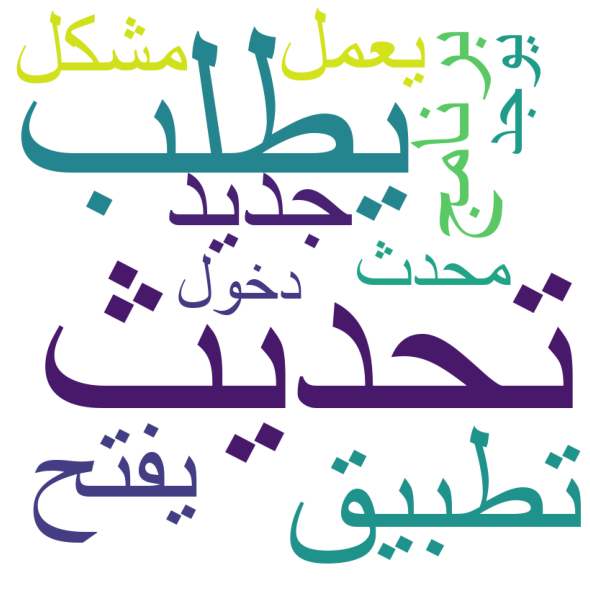

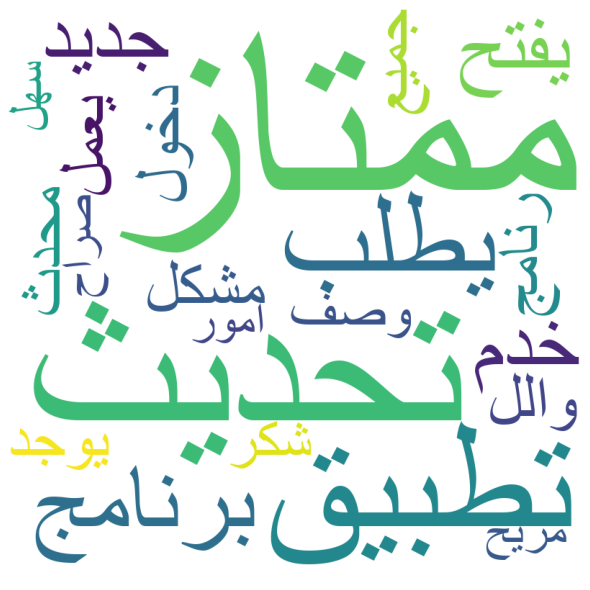

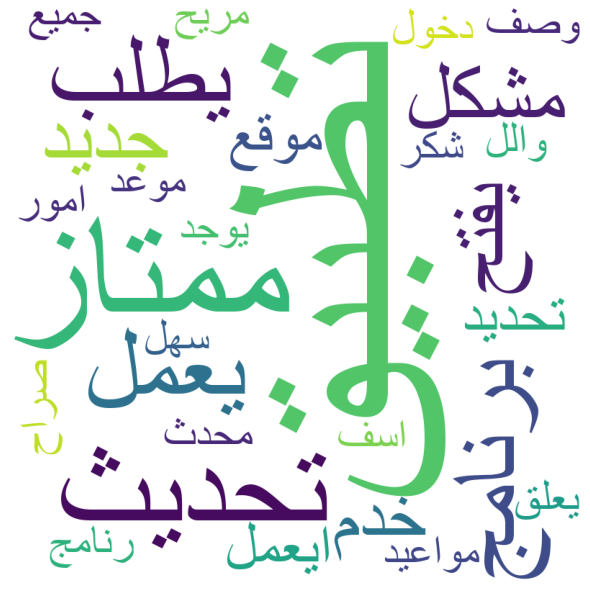

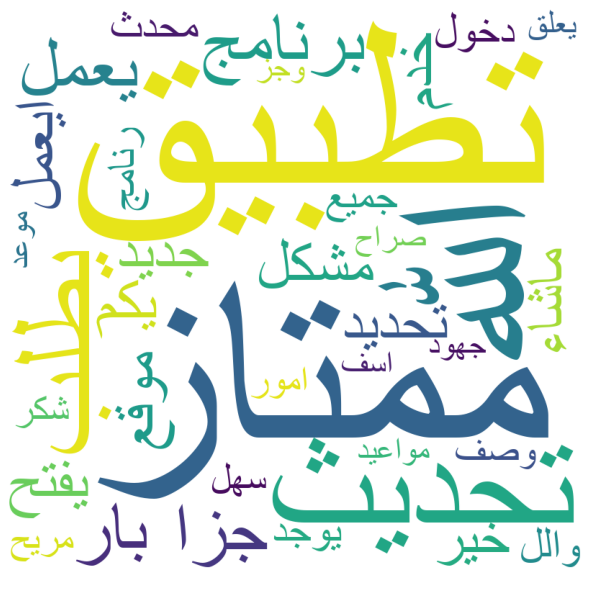

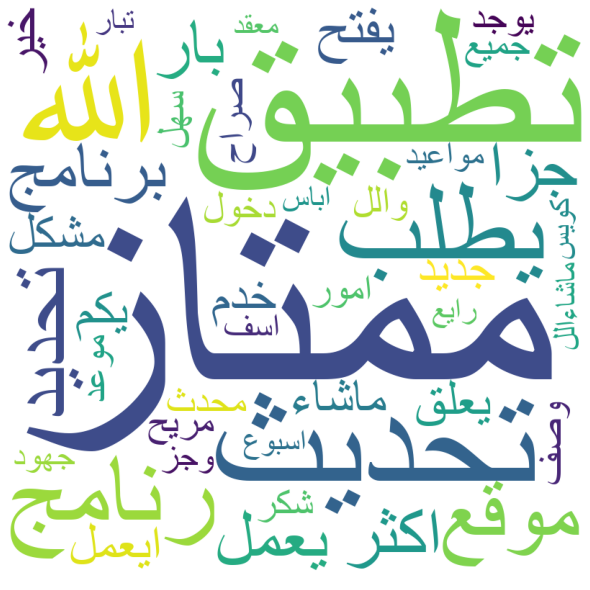

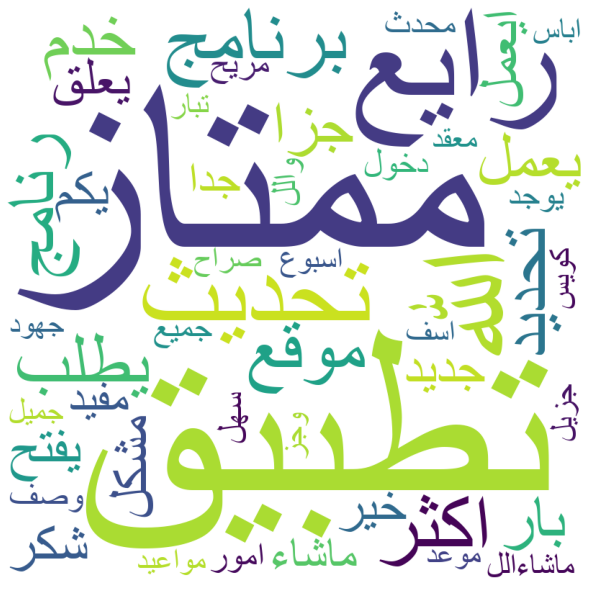

In [102]:

comment_words = '' 
stopwords = set(topics) 


for val in topics: 

    # typecaste each val to string 
    val = str(val) 

    # split the value 
    tokens = val.split() 

    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
        text_to_be_reshaped = tokens[i]
        reshaped_text = arabic_reshaper.reshape(text_to_be_reshaped)
        tokens[i] = reshaped_text[::-1] 
    comment_words += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', font_path = 'arial.ttf',
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = "white") 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

### A plot the number of most common opinions in tawakkalna application  using the plot method:

<AxesSubplot:>

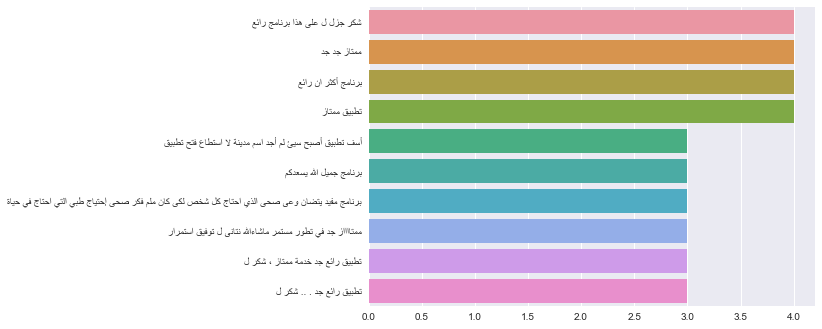

In [103]:
stop=stopwords_list
counter=Counter(data)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:10]:
    if (word not in stop) :
        reshaped_text = arabic_reshaper.reshape(word)
        word= reshaped_text[::-1] 
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)